In [3]:
library(tidyverse)
ggplot2::theme_set(theme_bw())

library(showtext)
font_add("nanum", "NanumGothic.ttf")
showtext_auto()

setwd("C:/Soongsil/R/Textmining")

In [4]:
font_add_google(name = "Black Han Sans", family = "blackhansans")
showtext_auto()

Warning message in file.rename(tmp, destfile):
"cannot rename file 'C:\tmp\RtmpyUXPRV\ea8Aad44WunzF9a-dL6toA8r8nqVIXSkH-Hc.ttf.curltmp' to 'C:\tmp\RtmpyUXPRV\ea8Aad44WunzF9a-dL6toA8r8nqVIXSkH-Hc.ttf', reason '액세스가 거부되었습니다'"


## 텍스트 마이닝 프로젝트 : 타다 금지법 기사 댓글 분석

- '타다 금지법'으로 불리는 '여객자동차 운수사업법 개정안'이 2019년 12월 5일 국회 국토교통위원회 교통법안심사소위를 통과했습니다. 법안에 관광 목적으로 11~15인승 승합차를 빌리는 경우에만 운전자를 알선할 수 있다는 규정이 있어서 타다는 더 이상 서비스는 유지할 수 없는 상황에 놓였습니다. 타다 금지법을 다룬 기사에 달린 댓글을 분석해 사람들이 어떤 생각을 하는지 알아보겠습니다.

### 01 주요 단어 탐색
- 단어 빈도를 구합니다
- 막대 그래프를 만들어 주요 단어를 탐색

**기본 전처리**

In [5]:
raw_tada <- read_csv("news_comment_tada.csv") %>%
  mutate(id = row_number())

glimpse(raw_tada)

Rows: 5270 Columns: 7
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (4): reply, press, title, url
dbl  (2): sympathyCount, antipathyCount
dttm (1): reg_time

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 5,270
Columns: 8
$ reg_time       <dttm> 2019-12-05 20:29:54, 2019-12-05 18:11:40, 2019-12-05 1~
$ reply          <chr> "祝[RHG::분단韓백년]결론:진정성!!<U+2714>결과적으로 타~
$ press          <chr> "연합뉴스", "연합뉴스", "연합뉴스", "연합뉴스", "연합뉴~
$ title          <chr> "'타다 금지법', 국토위 법안소위 통과", "'타다 금지법', ~
$ url            <chr> "https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&~
$ sympathyCount  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 3, 0, 1, ~
$ antipathyCount <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 0~
$ id             <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, ~


In [6]:
library(textclean)

In [7]:
tada <- raw_tada %>%
  filter(str_count(reply, " ") >= 1) %>%                   # 띄어쓰기 1개 이상 추출
  mutate(reply_raw = str_squish(replace_html(reply)),      # 원문 보유
         reply = str_replace_all(reply, "[^가-힣]", " "),  # 한글만 남기기
         reply = str_squish(reply)) 

In [10]:
tada %>% print

# A tibble: 5,123 x 9
   reg_time            reply      press title url   sympathyCount antipathyCount
   <dttm>              <chr>      <chr> <chr> <chr>         <dbl>          <dbl>
 1 2019-12-05 20:29:54 분단 백년~ 연합~ '타~  http~             0              0
 2 2019-12-05 18:11:40 러다이트 ~ 연합~ '타~  http~             0              0
 3 2019-12-05 17:43:39 저런것들~  연합~ '타~  http~             0              0
 4 2019-12-05 17:19:57 우버나 그~ 연합~ '타~  http~             0              0
 5 2019-12-05 17:11:39 택시승차~  연합~ '타~  http~             0              0
 6 2019-12-05 17:01:30 자율주행~  연합~ '타~  http~             0              0
 7 2019-12-05 16:59:57 옛말에도 ~ 연합~ '타~  http~             0              0
 8 2019-12-05 16:57:06 택시 자격~ 연합~ '타~  http~             0              0
 9 2019-12-05 16:48:51 이런 편법~ 연합~ '타~  http~             0              0
10 2019-12-05 16:46:22 똥남아보~  연합~ '타~  http~             0              0
# ... with 5,113 more rows, and 2 more variables: id <int>, reply_raw <chr>


**주요 단어 분석**

In [8]:
library(tidytext)
library(KoNLP)

Checking user defined dictionary!




In [11]:
word_noun <- tada %>%
  unnest_tokens(input = reply,
                output = word,
                token = extractNoun,
                drop = F)

In [13]:
# 단어 빈도 구하기
frequency <- word_noun %>%
  count(word, sort = T) %>%    # 단어 빈도 구해 내림차순 정렬
  filter(str_count(word) > 1)  # 두 글자 이상만 남기기

In [14]:
# 상위 단어 추출
frequency %>%
  head(30) %>%
  print(n = Inf)

# A tibble: 30 x 2
   word         n
   <chr>    <int>
 1 택시      3057
 2 기사       761
 3 국민       564
 4 혁신       451
 5 서비스     416
 6 들이       402
 7 불법       397
 8 생각       325
 9 산업       291
10 나라       278
11 영업       269
12 사업       261
13 사람       241
14 우버       237
15 진짜       234
16 정부       221
17 국회의원   210
18 이용       203
19 면허       202
20 하면       193
21 하게       185
22 승차거부   182
23 해서       181
24 규제       180
25 문제       177
26 운전       175
27 정치       169
28 국회       168
29 시대       167
30 우리나라   151


**불용어 제거**

In [15]:
# 불용어 목록 생성
stopword_noun <- c("들이", "하면", "하게", "해서")

In [17]:
# 주요 단어 목록 만들기
top20_noun <- frequency %>%
  filter(!word %in% stopword_noun) %>%
  head(20)

top20_noun %>% print

# A tibble: 20 x 2
   word         n
   <chr>    <int>
 1 택시      3057
 2 기사       761
 3 국민       564
 4 혁신       451
 5 서비스     416
 6 불법       397
 7 생각       325
 8 산업       291
 9 나라       278
10 영업       269
11 사업       261
12 사람       241
13 우버       237
14 진짜       234
15 정부       221
16 국회의원   210
17 이용       203
18 면허       202
19 승차거부   182
20 규제       180


**그래프 생성**

In [19]:
library(scales)

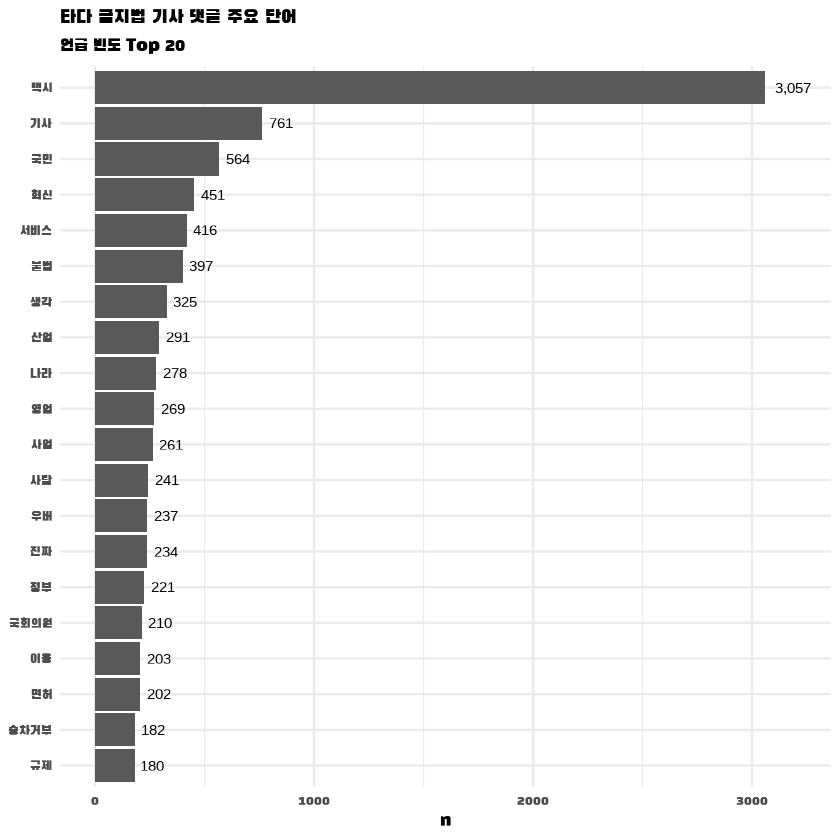

In [21]:
ggplot(top20_noun, aes(x = reorder(word, n), y = n)) +
  geom_col() +
  coord_flip() +
  geom_text(aes(label = comma(n, accuracy = 1)), hjust = -0.3) +  
  scale_y_continuous(limits = c(0, 3200)) +

  labs(title = "타다 금지법 기사 댓글 주요 단어",
       subtitle = "언급 빈도 Top 20",
       x = NULL) +

  theme_minimal() +
  theme(text = element_text(family = "blackhansans", size = 12),
        plot.title = element_text(size = 14, face = "bold"),      # 제목 폰트
        plot.subtitle = element_text(size = 13)) 

### 02 공감, 비공감 댓글 비교
- 공감 여부별 단어 빈도를 구한 다음, 데이터를 wide form으로 변형해 로그 오즈비를 계산
- 공감과 비공감 카테고리에서 상대적으로 중요한 단어를 추출해 막대 그래프 생성
- 주요 단어를 언급한 댓글 원문을 탐색

In [22]:
word_noun %>% print

# A tibble: 65,805 x 10
   reg_time            reply      press title url   sympathyCount antipathyCount
   <dttm>              <chr>      <chr> <chr> <chr>         <dbl>          <dbl>
 1 2019-12-05 20:29:54 분단 백년~ 연합~ '타~  http~             0              0
 2 2019-12-05 20:29:54 분단 백년~ 연합~ '타~  http~             0              0
 3 2019-12-05 20:29:54 분단 백년~ 연합~ '타~  http~             0              0
 4 2019-12-05 20:29:54 분단 백년~ 연합~ '타~  http~             0              0
 5 2019-12-05 20:29:54 분단 백년~ 연합~ '타~  http~             0              0
 6 2019-12-05 20:29:54 분단 백년~ 연합~ '타~  http~             0              0
 7 2019-12-05 20:29:54 분단 백년~ 연합~ '타~  http~             0              0
 8 2019-12-05 20:29:54 분단 백년~ 연합~ '타~  http~             0              0
 9 2019-12-05 20:29:54 분단 백년~ 연합~ '타~  http~             0              0
10 2019-12-05 20:29:54 분단 백년~ 연합~ '타~  http~             0              0
# ... with 65,795 more rows, and 3 more variables: id <int>, reply_raw <ch

- sympathyCount : 공감 수 / antipathyCount : 비공감 수
- 두 변수의 차이를 나타낸 변수 diff를 추가
- diff가 1이상이면 "like", -1이하면 "dislike", 그 외에는 "neural"로 분류해 공감 여부를 나타낸 sympathy 추가

In [24]:
word_sympathy <- word_noun %>%
  rename(like = sympathyCount,
         dislike = antipathyCount) %>%

  mutate(diff = like - dislike,
         sympathy = ifelse(diff >=  1, "like",
                    ifelse(diff <= -1, "dislike", "neutral")))

In [26]:
word_sympathy %>%
  distinct(id, .keep_all = T) %>%
  count(sympathy, sort = T)

sympathy,n
<chr>,<int>
neutral,2299
like,2055
dislike,757


**로그 오즈비**

In [27]:
# 단어 빈도 구하기
frequency_sympathy <- word_sympathy %>%
  count(sympathy, word) %>%              # 공감 여부 및 단어별 빈도
  filter(str_count(word) > 1 &           # 두 글자 이상 추출
         sympathy != "centrism")         # centrism 제거

In [28]:
# Wide form으로 변환하기
library(tidyr)
frequency_wide <- frequency_sympathy %>%
  pivot_wider(names_from = sympathy,
              values_from = n,
              values_fill = list(n = 0))

In [30]:
# 로그 오즈비 구하기
frequency_wide <- frequency_wide %>%
  mutate(log_odds_ratio = log(((like    + 1) / (sum(like    + 1))) /
                              ((dislike + 1) / (sum(dislike + 1)))))

frequency_wide %>%
  arrange(-log_odds_ratio) %>% print

# A tibble: 11,115 x 5
   word     dislike  like neutral log_odds_ratio
   <chr>      <int> <int>   <int>          <dbl>
 1 조합           0    25      12           2.79
 2 승용차         0    11      11           2.01
 3 타고           0    11       7           2.01
 4 무능           0    10       5           1.93
 5 마차           0     9      13           1.83
 6 베트남         0     9       7           1.83
 7 수수료         0     9       2           1.83
 8 스타트업       0     9      18           1.83
 9 전기           0     9       2           1.83
10 개혁           1    18      20           1.78
# ... with 11,105 more rows


**주요 단어 비교**
- 댓글에서 20회 이상 사용된 단어를 대상으로 로그 오즈비가 0보다 크면 "like", 그 외에는 "dislike"로 분류, 로그 오즈비가 가장 높거나 낮은 단어를 10개씩 추출

In [31]:
top10_odds <- frequency_wide %>%
  filter(like >= 20 | dislike >= 20) %>%
  group_by(sympathy = ifelse(log_odds_ratio > 0, "like", "dislike")) %>%
  slice_max(abs(log_odds_ratio), n = 10, with_ties = F)

top10_odds %>%
  arrange(log_odds_ratio) %>% print

# A tibble: 20 x 6
# Groups:   sympathy [2]
   word     dislike  like neutral log_odds_ratio sympathy
   <chr>      <int> <int>   <int>          <dbl> <chr>   
 1 렌트카        26    21      35        -0.676  dislike 
 2 한국          31    26      49        -0.641  dislike 
 3 댓글          20    17      18        -0.625  dislike 
 4 개인          19    23      29        -0.289  dislike 
 5 이재웅        25    33      37        -0.203  dislike 
 6 반대          19    26      39        -0.171  dislike 
 7 렌터카        15    21      19        -0.153  dislike 
 8 불법         111   156     130        -0.133  dislike 
 9 공유          29    42      30        -0.111  dislike 
10 자기          17    26      28        -0.0655 dislike 
11 시대          15    89      63         1.26   like    
12 콜택시         5    34      11         1.29   like    
13 승차거부      14    94      74         1.37   like    
14 이나라         2    20      22         1.47   like    
15 거부           2    21      10         1.52   like    
16 노조  

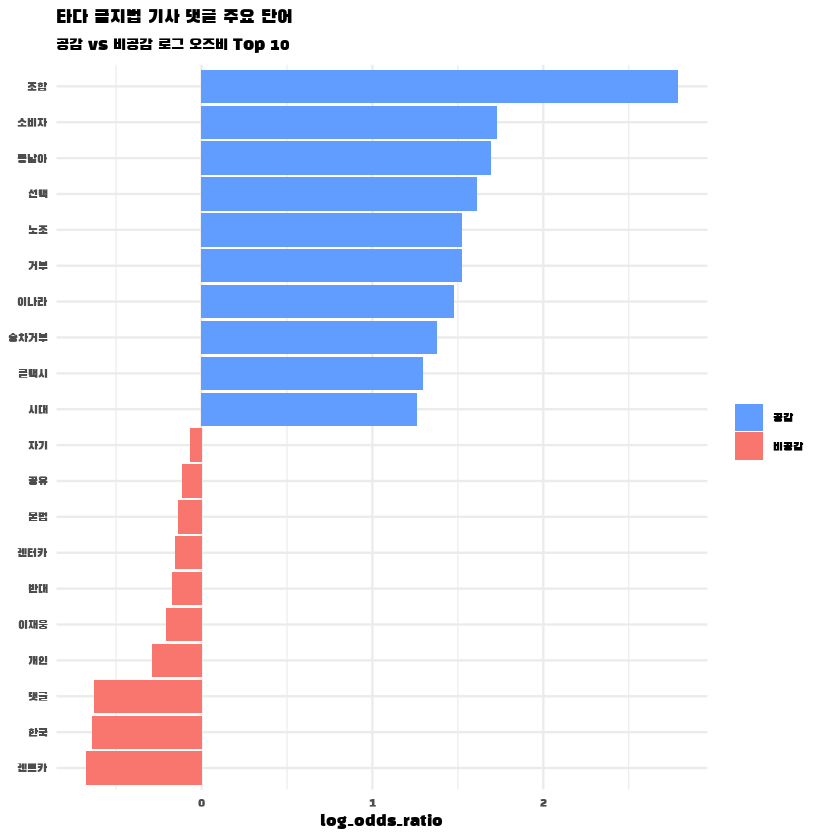

In [32]:
col_sentiment <- c("#619CFF", "#F8766D")

top10_odds$sympathy <- factor(top10_odds$sympathy,
                              levels = c("like", "dislike"))

ggplot(top10_odds, aes(x = reorder(word, log_odds_ratio),
                       y = log_odds_ratio,
                       fill = sympathy)) +
  geom_col() +
  coord_flip() +
  scale_fill_manual(values = col_sentiment,          # 막대 색깔
                    labels = c("공감", "비공감")) +  # 범례 순서

  labs(title = "타다 금지법 기사 댓글 주요 단어",
       subtitle = "공감 vs 비공감 로그 오즈비 Top 10",
       x = NULL, fill = NULL) +

  theme_minimal() +
  theme(text = element_text(family = "blackhansans"),
        plot.title = element_text(size = 14, face = "bold"),
        plot.subtitle = element_text(size = 12))

**댓글 내용 탐색**
- 주요 단어를 언급한 댓글 추출

In [33]:
tada %>%
  filter(str_detect(reply_raw, "조합")) %>%
  head(3) %>%
  pull(reply)

[1] "우리나라가 안되는 이유 기득권 특히 전국 노동조합 금속노조 환경단체 택시조합 수많은 조합업체 택시는 기득권만 내세우지 말고 국민들이 왜 싫어하는지 알기나 하길"                                                                     
[2] "수십만 재개발재건축 조합원이 피해보는 분양가상한제는 공익을 위해 사익은 희생될수 있다가 니네 논리잔아 개쓰렉 정권아"                                                                                                              
[3] "그럼 국민들의 피해는 모르겠니 어째 택시조합에서 나오는 표가 무시 못할거 같아 이번 선거에서 진정한 국민의 힘이 무엇인지 보여주고 너네들에게 헬조선에서 허우적대고 있는 국민의 피눈물에 대한 책임을 꼭 물을줄 알아라 에라이 카악 퇫"

In [41]:
library(crayon)
font <- combine_styles(make_style("black"),
                       make_style("white", bg = TRUE),
                       make_style("bold"))
font

font("폰트를 적용해 출력") %>% cat()

Crayon style function, black, bgWhite, bold: example output.

폰트를 적용해 출력

In [42]:
# 관심 단어 설정
keyword <- "조합"

# 댓글 추출해 스타일 적용
tada %>%
  filter(str_detect(reply_raw, keyword)) %>%
  head(3) %>%
  mutate(reply = paste0(str_replace_all(reply,
                                        keyword,
                                        font(keyword)))) %>%  # 스타일 적용
  pull(reply) %>%                                             # reply 추출
  cat(sep = "\n\n")

우리나라가 안되는 이유 기득권 특히 전국 노동조합 금속노조 환경단체 택시조합 수많은 조합업체 택시는 기득권만 내세우지 말고 국민들이 왜 싫어하는지 알기나 하길

수십만 재개발재건축 조합원이 피해보는 분양가상한제는 공익을 위해 사익은 희생될수 있다가 니네 논리잔아 개쓰렉 정권아

그럼 국민들의 피해는 모르겠니 어째 택시조합에서 나오는 표가 무시 못할거 같아 이번 선거에서 진정한 국민의 힘이 무엇인지 보여주고 너네들에게 헬조선에서 허우적대고 있는 국민의 피눈물에 대한 책임을 꼭 물을줄 알아라 에라이 카악 퇫


**공감, 비공감 댓글 원문 추출**

In [44]:
tada <- tada %>%
  left_join(word_sympathy %>%
              distinct(id, .keep_all = T) %>%  # 중복 댓글 제거
              select(id, sympathy, diff),      # 주요 변수 추출
            by = "id")

In [45]:
# 공감 댓글 추출
reply_like <- tada %>%
  filter(sympathy == "like") %>%     # like 추출
  arrange(-diff)                     # 공감 높은순 정렬

# 비공감 댓글 추출
reply_dislike <- tada %>%
  filter(sympathy == "dislike") %>%  # dislike 추출
  arrange(diff)                      # 비공감 높은순 정렬

In [67]:
# 조합
reply_like%>%
  filter(str_detect(reply_raw, "조합")) %>%
  head(10) %>%
  mutate(reply = paste0(str_replace_all(reply,
                                        "조합",
                                        font("조합")))) %>%  # 스타일 적용
  pull(reply) %>%                                             # reply 추출
  cat(sep = "\n\n")

국민들의 선택은 어떨까 나 같으면 타다 타겠다 택시 조합이 서민의 대중교통인 버스를 늘리는 것도 데모해서 못하게 하는 지역도 있더라

타다는 어짜피 적용할 산업이다 타다 금지법 이라고 기가 찬다 시대에 흐름을 거스르는 저런 법안은 도데체 누가 상정한거야 다 택시 조합에 뒷돈받는 국개가 있겠지 유치원 법에 개거품물고 달려드는 국개들만봐도 뻔하지 선택은 소비자가 해야지 법안으로 막는건 아니라 본다 솔직히 자율주행 자리 잡으면 택시기사 운수업이란 직업은 장기적으로 봐선 사라지는 직업 아니던가 그때 가서는 어쩔건데

국개의원 새 들 택시조합한테 돈 얼마쳐받았냐

택시조합 니들은 그게 독점이라고 생각안하지 미개한 족속같으니라고

지역 택시회사와 택시조합들의 뒷돈으로 일사천리 진행되는 스타트업 박해 국회 저러니 벤처 발전이 안되지 참나

국회의원 이 세끼들 택시조합한테 돈처먹고 하는 짓거리 하고는 대한민국 국회 수준이 후진국 수준이군 정말 안타깝다 어떻게 세월이 흘러도 변함이 없는지

퍽이나 첨단이다 불법 개인영업 택시 구 나라시 택시 와 콜택시의 조합 문재인 오른팔이 불법 개인영업 콜택시를 첨단산업이라고 말을 바꾸고 봉이 김선달 식으로 날로 꽁짜로 대규모 투자를 받아서 만든 불법 회사 다시말하자면 타다 불법 변종 콜택시 사업 이름하여 구 나라시 택시

그럼 국민들의 피해는 모르겠니 어째 택시조합에서 나오는 표가 무시 못할거 같아 이번 선거에서 진정한 국민의 힘이 무엇인지 보여주고 너네들에게 헬조선에서 허우적대고 있는 국민의 피눈물에 대한 책임을 꼭 물을줄 알아라 에라이 카악 퇫

대한민국 자유민주주의 공화국이며 노조입김이빠이공화국이자 떼쓰면해주는공화국으로써 국민의 편의는 없고 대기업과 그노조의 일당들만 위하는 나라요 서민들은 죽어나도 대기업과 그노조들 그외 수많은 단체와 조합들의 세상일세

골때리는 대한민국법 자기네가 국민을 대표로 만들어 놓고 택시조합 표 못얻을꺼 같으니 근방 법을 바꾸고 지랄맏은 정치인들 줏대가 없어


- ```"조합"``` : 택시 조합이 독점적인 권한을 유지하고 있다.

In [68]:

# 소비자
reply_like%>%
  filter(str_detect(reply_raw, "소비자")) %>%
  head(10) %>%
  mutate(reply = paste0(str_replace_all(reply,
                                        "소비자",
                                        font("소비자")))) %>%  # 스타일 적용
  pull(reply) %>%                                             # reply 추출
  cat(sep = "\n\n")


공산국가가 되어가는구나 대중교통 이외에 소비자의 선택권은 오직 택시 만 이용하라고 못 박아 놓다니 독과점도 이런 독과점이 없네 이러니 택시 기사들이 갑질하듯 서비스 정신 하나 없이 지들 맘대로 골라태우고 막 교통법규 우습게 알고 운전들 쳐 하지 경쟁을 통해 서비스 개선 할 생각은 없고 내 밥그릇에 숟가락 얻지 말라고 난리치고 그걸 또 받아주네 국회 나으리님들께서 이러니 택시가 서비스 발전과 운전습관 드러운게 나아지지 않지 에이 퉷 더러운 뒷거래 택시관련 유권자가 아쉽더냐 아니면 택시노조가 무섭더냐

소비자들이 편하면 탈거고 불편하면 도태될텐데 왜 정부가 앞장서서 소비자에 선택 권한을 뺐는건가 기대했던 이번정부도 실망이 크다

국토부와 포퓰리즘 국회가 후진적인 대한민국을 만들고 있어 소비자는 없고 기득권만 보호하고 새로운 산업 기술에는 등한시

타다에 혁신은 없는데 택시보다 친절하고 편해 소비자 입장에선 그게 젤 중요해

원래 경쟁해야 하는거 아닌가 이때까지 독점으로 있었다 보니 밥그릇 뺏긴다 라고 하는것 같은데 그럼 자체적으로 발전을 했어야지 서비스 개선 했어야지 개인적인 경험에 의하면 친절한 기사님보다 불친절한 기사님들이 더 많았고 도로위에서 얼마나 위험한 운전을 많이 하는지 소비자가 서비스 좋고 더 편안한 것을 이용하겠다는데 물론 노력은 하시겠지요 근데 이제는 노력가지고 않됩니다 잘해야지요

택시 냄새나고 돌아가서 요금 더 나오고 여성 승객에게 성희롱이나 하고 지들 멋대로 승차거부도 하는데 택시 기사가 받는 피해라고 그럼 소비자들 피해는 어떻게 할건데

승차거부 오지게 하고 카 택시 같은것도 콜 와도 돈 안되는 건 아예 받지도 않고 가까운 거리라도 가려고 하면 승객한테 다 들리게 혼잣말로 하고 승객이 택시 이용하면서 느끼는 서비스 상태가 개판이라 더 좋은 서비스를 제공하는 걸 찾겠다는거고 택시보다 더 나은 서비스를 제공하는 게 있으니 그걸 선택한 것 뿐인데 그런 소비자의 당연한 선택을 법으로 강제하겠다는 발상부터가 시대 흐름에 역행하는거지

타다는 어짜피 

- ```"소비자"``` : 소비자의 권리를 무시하고 기업 입장만 고려해 법안이 만들어졌다.

In [69]:
# 동남아
reply_like%>%
  filter(str_detect(reply_raw, "동남아")) %>%
  head(10) %>%
  mutate(reply = paste0(str_replace_all(reply,
                                        "동남아",
                                        font("동남아")))) %>%  # 스타일 적용
  pull(reply) %>%                                             # reply 추출
  cat(sep = "\n\n")

그냥 대한민국은 규제로 인해 망할수 밖에 없다 영국처럼 유럽에서 가장 늦게 자동차 도입한 국가 꼴 될듯 동남아 가봐라 개나소나 크랩 이용해다닌다 동남아보다 못한게 자칭 강국 한국현실이다

동남아도 우버가 판치는데 표때문에 실시하는 법안이라니 국회의원탓할것도 없는게 우리나라 수준이 저 정도인거야

미국에서 우버 동남아에서 그랩 타고 다녔는데 정말 개편했슴 요금 일반 택시보다 싼거는 둘째치고 어플 실행해서 신청하면 몇분도 안되서 내 코앞으로 옴 위치 설명 안해도 알아서 연계되서 설명안해도 기사가 알아서 감 결제 카드 등록 하면 내릴때 그냥 내리면 됨 지갑 불필요 기사 평점제가 있어서 굉장히 친절하고 짭소리 안함 평점 등록 동시에 기사한테 팁주는 버튼이 있는데 클릭하면 내카드에서 선택한 금액만큼 팁이 결제됨 이러다보니 좀 장거리 가거나 고생한 기사 있으면 내가 절로 팁 주고 평점도 높게 해줌

헬조선에서 혁신은 이미 물건너갔다 구한말이 재현되고 있어 그 때도 권신과 흥선대원군이 나라를 닫아버리고 서양기술을 막아버리는 바람에 나라가 후진국으로 밀려 결국 망했쟎아 시대가 바뀌어도 기득권 세력의 압력이 국민보다 무서운가 보다 동남아 보다 밀리는 현실 퉷

동남아에선 그랩이랑 현대랑 해서 자율주행으로 넘어가려고하는데 떼법민국은 아직도 택시만 하네

새로운 먹거리를 밥그릇 싸움으로 보내그려 동남아가서 그랩한번 타봐라 택시도 같이 경쟁한다

우리보다 못한 동남아를 가도 우리 시스템보다 낫다 택시 기사만 우리 국민이냐 먹고 살겠다는데 대중교통뺴놓고 독식하다시피하는 택시들 이모든 것이 경쟁이 되어야 한다 요즘 처럼 추울떄 밤에 택시 잡아보아라

택시를 타든 타다를 타든 그건 내가 결정해 너희들이 표의식해서 규제로 묶어놓을게 아니라구 동남아만도 못하네

동남아만 가도 그랩 엄청 편하고 좋던데 우린 이제 동남이한테도 뒤지는구나

아니 솔직히 미국 택시 없냐 영국 프랑스 캐나다 택시 없냐 동남아 택시없냐 근데 다 택시 있고 우버있고 고객이 편한거 골라 타는거지 니들 목구멍 때문에 왜 

- ```"동남아"``` : 동남아시아 국가는 승차 공유 서비스가 활성화된 반면 한국은 그렇지 않다

In [74]:
# 렌트카
reply_dislike%>%
  filter(str_detect(reply_raw, "렌트카")) %>%
  head(10) %>%
  mutate(reply = paste0(str_replace_all(reply,
                                        "렌트카",
                                        font("렌트카")))) %>%  # 스타일 적용
  pull(reply) %>%                                             # reply 추출
  cat(sep = "\n\n")

타다가 택시 역활을 하면 안된다 타다가 합법화되면 전국에 유사 타다가 넘쳐 난다 택시는 좋아하진않지만 사업면허를 무사고로 해서 취득한사람도 있고 돈을주고 산 사람도 있다 근데 타다는 렌트카를 가지고 경쟁도 안하고 택시 사업을 한다는건 옳지않다 법 개정후에 타다를 하든지 말든지 하고 지금은 불법이 맞다

현정부는 타다에 뇌물쳐먹었냐 렌트카로 불법콜택시하는 타다가 차산업 장난해 검찰은 김상조부터 죠지고가자

근데 하나만 묻자 이게 왜 미래산업이냐 그냥 렌트카 영업하는거잖아 무슨 되도 안한 미래산업이야기를 하고 있어 스마트폰으로 배차하면 다 미래산업이냐

렌트카 불법 택시 없애자는데 왜 난리여 승차공유 혁신 어쩌구저쩌구하는 헛된논리는 그만하셔 기존 질서 안에서 혁신이고 공유가 있는거지 대단한거라고 특혜를 받아야하나 문씨 측근이라 그러겠지 너두나두 여당측에서 같이 난리치는 꼴이란

정확히 말해서 타다금지법이 아니야 오버하지마 돈내고 전국택시 총량내에서 플랫폼면허받고 운송업하라는거다 호구들아 이재웅이 뭔데 특혜를 줘야 하는데 카니발렌트카로 택시영업하는게 차산업이야 혁신이야 하긴 뭐 아직도 저런변종형태의 택시영업을 신산업이라고 추켜세우며 특혜를 주지못해서 안달난 정부관계자들이 대부분이지만 그런 무능한 인간들이 국가운영을 이따구로하니 나라가 조용할날이 있겄나 이재웅한테 기여금도 제대로 받아라 보는눈 한두명이 아니다

멍청하다 국민의 탈권리같은 소리하네 저거 유송운송을 렌트카인정을 해주면 교통채증에 다 박살난다 여기저기 렌트카에서 유사업종창업한후 서울에만 개업체가 덤벼드는순간 강남 홍대 종로는 아예 차가안움직일거다 주차장되서 유상운송은 댓수제한 영업일제한 교육필요가 맞다

이재웅 미래가 겨우 경유렌트카로 불법택시영업이냐 도데체 뭔데 법위에 군림하려하는지 편의성에 모든게 수용된다고보는가 에라이

렌트카로 돈받고 택시하는게 적법한거면 집에서 상거풀 수술도 허용하고 집에서 담배제조하고 술제조해서 파는것도 허용하는게 맞지 타다가 차산업혁명이라고 뒤에서 밀어준 정부도 참

정말 좌빨

- ```"렌트카"``` : 타다는 렌트카와 비슷한 사업이므로 특혜를 주면 안 된다

In [83]:
# 한국
reply_dislike%>%
  filter(!str_detect(reply_raw, "한국당")) %>%
  filter(str_detect(reply_raw, "한국")) %>%
  head(10) %>%
  mutate(reply = paste0(str_replace_all(reply,
                                        "한국",
                                        font("한국")))) %>%  # 스타일 적용
  pull(reply) %>%                                             # reply 추출
  cat(sep = "\n\n")

택시놈들 이기주의가 혁신성장을 가로막는다 솔직히 미국에 살지만 한국보면 노답이다

공유를 사전에서 찾으면 한 물건을 두사람 이상이 나눠갖는다는 뜻으로 결국 제조업이 타격을 입게됩니다 한국 자동차가 만대 타다 공유차량이 시작되서 차 한대로 명 명 공유하면 결국 완성차업체인 현대차 기아차 생산직은 물론 전장부품 업체부터 금속 산업까지 근로자들의 생계가 사라집니다 이재웅씨 남의 나라 따라할것이 아니라 울산 광주 지역 상인들과 주민들의 생계는 안보이시나요 어디다 국민들의 이익을 거론 하십니까 전 국민들이 일어나 저들의 공유차량을 반대해야만 합니다

시대 역행하는 헬조선 코리아 나중에 다른나라는 자동운전 도입할때도 택시운전수 기득권 챙기느라 한국만 뒤떨어지겠네

타다 도 결국 우버처럼 한국에서 철퇴맞네 이게 나라냐 택시 너네가 서비스향상해봐 지나다니는 택시타지 굳이 비싸고 앱으로 부르는 차 탈까

안전 불감증 강한 한국 사고는 갑자기 일어난다 한국 될대로 대라식의 타다의 이용자들은 사고시 법적 보호 못받아 그럼 자기가 사고나면 또 나라탓을 하겠지

타다 우버가 한국에 정착되려면 택시기사들 면허를 대당 최소 억은 주고 그들의 본전은 찾게해주고 시작해야한다 무임승차는 반발만 불러일으킨다

바보 멍청한 국민들아 우버가 선행되려면 우선 참된 명분이 있어야 된단다 근데 이거아니 선진국 중여 한국이 제일 가격이 후진국 수준이고 접근성이 세계 최고라는 것 택시기사 인성 논하지 아니 그게 기사들 잘못이 아니라 정부 정책이 그렇게 만들었다는걸 참고로 외국인들이 한국 서비스업중에 제일 좋은 게 택시거든 바브들 난 택시 많이 타고 다니지만 여태것 불량기사 만난것은 밖에 안된단다 너 자신을 알라

관광 뭔 놈의 관광 뭐 헬조선이나 한번 둘러보러 다녀야하나 제발 국회 늙다리들 짤라내라 정말 시대가 어느시대인데 지금 답답하다 모든게 뒤처져있는 대한민국 그저 빠른 성장했다고 자뻑이나 하는 대한민국 그걸 또 밀고 있는 한국늙다리국회동호회

이제는 택시업계의 서비스 개선이 문제가아니라 택시업계가 경

- ```"한국"``` : 한국의 택시 없계를 보호해야 한다. 법안이 한국의 서비스업 발전을 막는다

**분석 결과 종합**
- 공감을 많이 받은 댓글은 택시 조합에 비판적이거나 소비자의 권리를 강조하는 내용, 동남아 국가보다 한국의 승차 공유 서비스가 뒤쳐져 있다는 내용
- 공감을 받지 못한 댓글은 타다가 렌터카 서비스이므로 특혜를 주면 안 된다는 내용

### 03 관심 댓글 비교
- 댓글을 카테고리별로 분류해 TF-IDF를 구합니다
- 카테고리별 주요 단어를 추출해 막대 그래프
- 주요 단어가 사용된 댓글을 추출해 내용을 탐색

In [84]:
# 단어 목록 생성
category1 <- "택시 업계|택시업계|조합"
category2 <- "정부"
category3 <- "국회의원|한국당|자유한국당|자한당|자한|민주당|더불어민주당"

In [85]:
# 추출 및 결합
bind_category <- bind_rows(
  word_sympathy %>%
    filter(str_detect(reply, category1)) %>%
    mutate(category = "택시업계"),

  word_sympathy %>%
    filter(str_detect(reply, category2)) %>%
    mutate(category = "정부"),

  word_sympathy %>%
    filter(str_detect(reply, category3)) %>%
    mutate(category = "국회의원"))

In [86]:
# 카테고리별 빈도
bind_category %>%
  group_by(id) %>%
  distinct(category, .keep_all = T) %>%
  ungroup() %>%
  count(category)

category,n
<chr>,<int>
국회의원,320
정부,229
택시업계,146


**TF-IDF**

In [87]:
# 불용어 목록 생성
stopword_category <- c("택시 업계", "택시업계", "업계", "조합",
                       "정부", "국회의원", "한국당", "자유한국당",
                       "자한당", "자한", "민주당", "더불어민주당")

In [88]:
# 카테고리별 단어 빈도 구하기
frequency_category <- bind_category %>%
  filter(!word %in% stopword_category) %>%  # 불용어 제외

  group_by(id) %>%                          # 댓글별 분리
  distinct(word, .keep_all = T) %>%         # 댓글 내 중복 단어 제거
  ungroup() %>%                             # 그룹 해제

  count(category, word, sort = T) %>%       # 카테고리별 단어 빈도
  filter(str_count(word) >= 2)              # 2글자 이상 추출

In [90]:
tfidf_category <- frequency_category %>%
  bind_tf_idf(term = word,
              document = category,
              n = n) %>%
  arrange(-tf_idf)

tfidf_category %>% print

# A tibble: 4,145 x 6
   category word         n      tf   idf  tf_idf
   <chr>    <chr>    <int>   <dbl> <dbl>   <dbl>
 1 국회의원 박홍근      12 0.00411 1.10  0.00451
 2 국회의원 발의        10 0.00342 1.10  0.00376
 3 정부     현정부       5 0.00204 1.10  0.00225
 4 택시업계 대기업       4 0.00191 1.10  0.00210
 5 택시업계 밥그릇      10 0.00479 0.405 0.00194
 6 국회의원 기억         5 0.00171 1.10  0.00188
 7 국회의원 만장일치     5 0.00171 1.10  0.00188
 8 국회의원 명단         5 0.00171 1.10  0.00188
 9 국회의원 투표         5 0.00171 1.10  0.00188
10 정부     가족         4 0.00164 1.10  0.00180
# ... with 4,135 more rows


### 카테고리별 주요 단어 비교

In [91]:
# 주요 단어 추출, 불용어 확인
tfidf_category %>%
  group_by(category) %>%
  slice_max(tf_idf, n = 15, with_ties = F) %>%
  print(n = Inf)

# A tibble: 45 x 6
# Groups:   category [3]
   category word               n       tf   idf  tf_idf
   <chr>    <chr>          <int>    <dbl> <dbl>   <dbl>
 1 국회의원 박홍근            12 0.00411  1.10  0.00451
 2 국회의원 발의              10 0.00342  1.10  0.00376
 3 국회의원 기억               5 0.00171  1.10  0.00188
 4 국회의원 만장일치           5 0.00171  1.10  0.00188
 5 국회의원 명단               5 0.00171  1.10  0.00188
 6 국회의원 투표               5 0.00171  1.10  0.00188
 7 국회의원 게임               4 0.00137  1.10  0.00150
 8 국회의원 국회의윈님하고     4 0.00137  1.10  0.00150
 9 국회의원 깨구락지           4 0.00137  1.10  0.00150
10 국회의원 꼴통               4 0.00137  1.10  0.00150
11 국회의원 만세               4 0.00137  1.10  0.00150
12 국회의원 만수무강           4 0.00137  1.10  0.00150
13 국회의원 보시               4 0.00137  1.10  0.00150
14 국회의원 빙자               4 0.00137  1.10  0.00150
15 국회의원 열폭               4 0.00137  1.10  0.00150
16 정부     현정부             5 0.00204  1.10  0.00225
17 정부     가족               4 0.00164  1.10  0.00180
18 

In [92]:
# 불용어 목록 생성
stopword_tfidf <- c("국회의윈님하고", "현정부", "에휴")

In [93]:
# 주요 단어 추출
top10 <- tfidf_category %>%
  filter(!word %in% stopword_tfidf) %>%
  group_by(category) %>%
  slice_max(tf_idf, n = 10, with_ties = F)

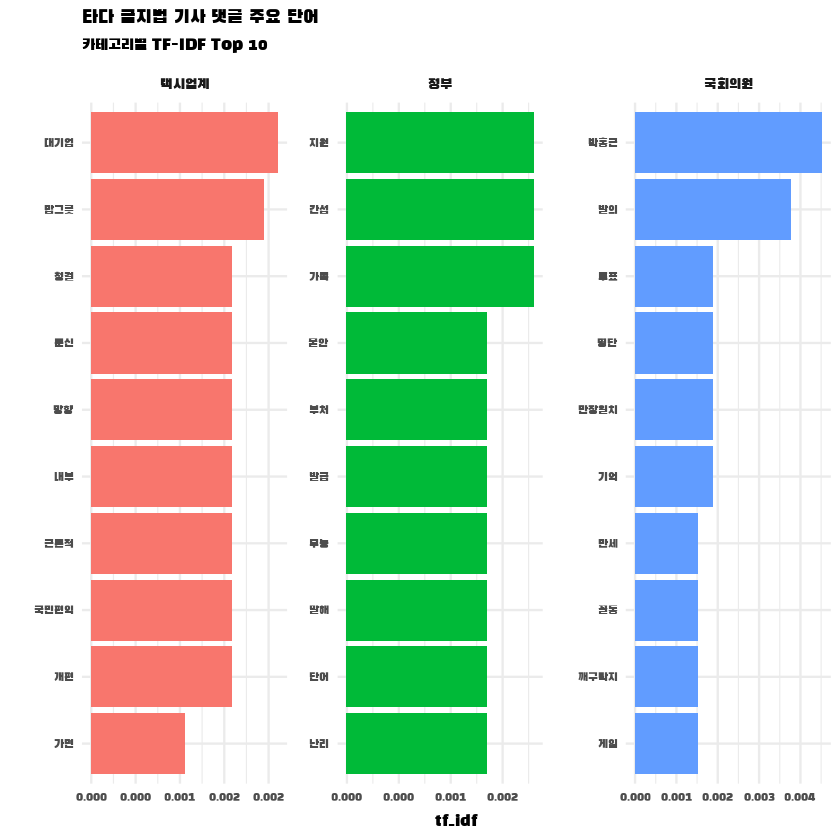

In [94]:
top10$category <- factor(top10$category,
                         levels = c("택시업계", "정부", "국회의원"))

ggplot(top10, aes(x = reorder_within(word, tf_idf, category),
                  y = tf_idf,
                  fill = category)) +
  geom_col(show.legend = F) +
  coord_flip() +
  facet_wrap(~ category, scales = "free", ncol = 3) +
  scale_x_reordered() +
  scale_y_continuous(n.breaks = 5,
                     labels = number_format(accuracy = .001)) +

  labs(title = "타다 금지법 기사 댓글 주요 단어",
       subtitle = "카테고리별 TF-IDF Top 10",
       x = NULL) +

  theme_minimal() +
  theme(text = element_text(family = "blackhansans"),
        plot.title = element_text(size = 14, face = "bold"),
        plot.subtitle = element_text(size = 12),
        strip.text = element_text(size = 11))  # 카테고리명 폰트

**카테고리별 댓글 내용 탐색**

In [95]:
# 중복 댓글 제거
reply_category <- bind_category %>%
  group_by(category) %>%
  distinct(id, .keep_all = T)

In [97]:
reply_category %>% print

# A tibble: 695 x 13
# Groups:   category [3]
   reg_time            reply     press title url    like dislike    id reply_raw
   <dttm>              <chr>     <chr> <chr> <chr> <dbl>   <dbl> <int> <chr>    
 1 2019-12-05 20:29:54 분단 백~  연합~ '타~  http~     0       0     1 祝[RHG::~
 2 2019-12-05 19:02:57 택시업계~ 연합~ '타~  http~     1       1   104 택시업계~
 3 2019-12-05 18:49:27 타다가 ~  연합~ '타~  http~     2       1   134 타다가 ~ 
 4 2019-12-06 02:16:27 택시업계~ 연합~ '타~  http~     0       0   156 택시업계~
 5 2019-12-06 12:49:26 택시업계~ 연합~ '타~  http~     0       0   219 택시업계~
 6 2019-12-06 12:39:03 우리나라~ 연합~ '타~  http~     0       0   227 우리나라~
 7 2019-12-06 12:37:30 결국 선~  연합~ '타~  http~     0       0   228 결국 선~ 
 8 2019-12-06 11:39:06 우리나라~ 연합~ '타~  http~     1       0   307 우리나라~
 9 2019-12-06 11:26:16 중국에 ~  연합~ '타~  http~     0       0   331 중국에 ~ 
10 2019-12-06 11:05:57 택시업계~ 서울~ ‘타~  http~     0       0   383 택시업계~
# ... with 685 more rows, and 4 more variables: word <chr>, diff <dbl>,
#   sympat

In [102]:
# 택시업계 카테고리
reply_category %>%
    filter(category == "택시업계") %>%
    filter(str_detect(reply_raw, "대기업")) %>%
    head(10) %>%
    mutate(reply = paste0(str_replace_all(reply_raw,
                                         "대기업",
                                         font("대기업")))) %>%
    pull(reply) %>%
    cat(sep = "\n\n")

타다가 신사업이냐? 기존 택시랑 아주 똑같은 개념의 사업을 대기업이 택시업계 말살하고 독식하겠단거지.. 이런 게 논란이 되고 있다는 자체가 넌센스..

대한민국 자유민주주의 공화국이며, 노조입김이빠이공화국이자, 떼쓰면해주는공화국으로써 국민의 편의는 없고 대기업과 그노조의 일당들만 위하는 나라요, 서민들은 죽어나도 대기업과 그노조들 그외 수많은 단체와 조합들의 세상일세....

진짜 머저리들아 택시업계 눈치보는 ㅅ ㄲ 들 때문에 국민 편의성은 무시되는 잦도 논리도 없고 명분도 없는 법을 왜 통과시키려고 하냐. 그따위 개도 안먹히는 논리대로면 동네 슈퍼마켓도 보호해 줘야하니 대기업 마트들 들어오면 안되고 빵집도 보호해줘야하니 대기업 빵집은 막아야 하는거 아니냐? 사회주의 시장경제로 가라 그냥

타다가 4차산업. 아님. 대기업이 소규모 택시업계 빨대 꽂아 빨아먹는 것임.


In [103]:
# 정부 카테고리
reply_category %>%
    filter(category == "정부") %>%
    filter(str_detect(reply_raw, "지원")) %>%
    head(10) %>%
    mutate(reply = paste0(str_replace_all(reply_raw,
                                         "지원",
                                         font("지원")))) %>%
    pull(reply) %>%
    cat(sep = "\n\n")

4차산업 같은 소리하고 있네. 말 따로 정부 지원 없는 대한민국 경제 발전? 정말 이 나라는 뭘 먹고 사려고하는지 모든 비지니스를 규제와 노동법으로 막아 놓고 있구나. 정말 해외로 뜨려는 사람들 러쉬가 있을까 겁난다

택시기사들 눈치 보지 말고, 내년 선거를 의식 하지 말고, 불법은 불법으로 규정 짓고 합법은 대대적인 지원을 통해 국민의 삶을 더욱 윤택하게 하라. 내년 제정만 방만하게 하면 나라 살림과 국민의 삶이 풍요롭게 되는지 되묻고 싶다. 소득이 주도하는 성장은 이제 그만하고 멀리 볼 수 있는 국가적 먹거리에 투자하길 바란다. 지금 정부가 쏟아 붓고 있는 내년 예산은 빛이며 후대의 우리 자손들이 값아야 할 빚이다. 이정부 너무하네.... ㅠ

개발도상국 지위나 박탈 해라. 선진국 비교질 하면서 왜 아직도 개발도상국 지위 가지고 있냐 어디 하나 경쟁력이 없고 정부 지원금만 축내는 기업들이 태반이다

택시도 자가용 폭증으로 승객이 감소해서 영업이 어려운 탓에 ,증차도 중지되고 오히려 감차를 논의하는 지경이다.심지어 지난 정부 탄생 직전에는 택시사업의 경영악화를 개선코자 대중교통 지원법까지 논의한 적이 있었다.수입 감소로 열악한 택시 종사자들의 고충을 외면하지 말라.

택시사업자들 고용불안이 문제라면 타다고용을 기존 택시업자들에게서 뽑으면 어떨까요? 이렇게 시대에 역행하면 반발옵니다 택시쪽에서 무조건 막지말고 공유경제도입을 스스로 서둘러야합니다 이번에만 막았지 점점 막을수 없는 상황이 올겁니다 나중에 어차피 5단계 자율주행되는순간 인간이 하는 운전 자체가 없어집니다 택시기사들 이직지원을 정부에서 해주던가 지금부터 바꿔야합니다 미래를 보세요 제발


In [104]:
# 국회의원 카테고리
reply_category %>%
    filter(category == "국회의원") %>%
    filter(str_detect(reply_raw, "박홍근")) %>%
    head(10) %>%
    mutate(reply = paste0(str_replace_all(reply_raw,
                                         "박홍근",
                                         font("박홍근")))) %>%
    pull(reply) %>%
    cat(sep = "\n\n")

더불어민주당 박홍근 의원이 대표 발의했다. 더불어민주당 박홍근 의원이 대표 발의했다. 더불어민주당 박홍근 의원이 대표 발의했다.

타다 금지법 발의한 의원 - 더불어민주당 박홍근

그래도정의로운국회의원이있어다행입니다 박홍근의원화이팅중랑구조합원님들 내년선거에꼭지원바랍니다본회의통과응원합시다

타다 금지법, 민주당 박홍근 기억한다.

타다금지법안은 박홍근 국회의원이 발의했습니다 공감눌러주시고 똑똑히 기억했다가 총선에서 다신뽑지맙시다

뭔 개소리야? 택시를 타다처럼도 쓸수있게 하겠다는게 결국은 택시만 배불리겠다는거 맞자나! 국민이 편하게 사용할 수 있는 제도를 굳이 택시에게만 몰아주려는 놈이 로비스트나 브러커지 국회의원이야? 난 민주당 권리당원이지만 박홍근은 절대 지지못한다! 택시들이 국민들을 볼모로 자신들의 주머니를 불리기위해 떼로 몰려다니며 패악질을 저질렀는데,타다를 이용하는 국민들은 맘편히,몸편히 이용하는데,좀 잊을만하면 민주당에 저런 똥볼차는것들이 나와서는...

박홍근의원, 더불민주당. 서울 중랑구 을 의원

민주당 박홍근의 살아온 궤적을 보면, "386의 막내 69년생, 전대협동우회장, 반값등록금 주도, 박원순, 민족화해협력범국민, 615공동선언실천 남측위원회, 경희대 총학생회장, 순천효천고, 더불어민주당 을지로위원회, 동북아역사왜곡대책특별위원회...전과2범, 중랑구 재선의원" 이렇게 살아온 사람이 혁신산업을 막 주물러도 되는건가? 민주당에 그렇게 인물이 없나? 김병관이니 뭐니 하면서 젊은 혁신사업가 영입해서 공천도 주고 하던데, 결국 박홍근처럼 평생을 혁신산업이랑 상관없이 살아온 사람이 법안을 주무르게 하나? 민주당 실망이다

박홍근 의정활동 열심히 하는 국회의원 열심히 일하시는 모습 보기 좋아요

웃기는 헛소리 작작해라... 박홍근 너구나...택시 앞잡이가.. 민주당새끼들은 앞잡이 전문집단이군..


### 04 단어 간 관계 살펴보기
- 파이 계수를 구해 관심 단어와 관련성이 큰 단어 추출
- 막대 그래프를 만들어 주요 단어 탐색
- 네트워크 그래프를 만들어 단어의 관계를 탐색
- 단어쌍이 언급된 댓글을 추출해 내용을 탐색

**파이 계수**

In [105]:
# 토큰화
pos_tada <- tada %>%
  unnest_tokens(input = reply,
                output = word_pos,
                token = SimplePos22,
                drop = F)

In [106]:
# 품사 태그 정리
separate_pos_tada <- pos_tada %>%
  separate_rows(word_pos, sep = "[+]") %>%                   # 품사 태그 분리
  filter(str_detect(word_pos, "/n|/pv|/pa")) %>%             # 품사 추출
  mutate(word = ifelse(str_detect(word_pos, "/pv|/pa"),      # "/pv", "/pa" 추출
                       str_replace(word_pos, "/.*$", "다"),  # "~다"로 바꾸기
                       str_remove(word_pos, "/.*$"))) %>%    # 태그 제거
  filter(str_count(word) >= 2) %>%                           # 2글자 이상 추출
  arrange(id)

separate_pos_tada %>%
  select(word) %>% print

# A tibble: 55,567 x 1
   word    
   <chr>   
 1 분단    
 2 결론    
 3 진정성  
 4 결과적  
 5 타다    
 6 택시    
 7 맞다    
 8 택시업계
 9 헌법위반
10 드론택배
# ... with 55,557 more rows


In [107]:
library(widyr)
word_cors <- separate_pos_tada %>%
  add_count(word) %>%
  filter(n >= 20) %>%
  pairwise_cor(item = word, feature = id, sort = T)

word_cors %>% print

# A tibble: 128,522 x 3
   item1  item2  correlation
   <chr>  <chr>        <dbl>
 1 역행하 시대         0.408
 2 시대   역행하       0.408
 3 냄새   담배         0.333
 4 담배   냄새         0.333
 5 챙기다 밥그릇       0.293
 6 밥그릇 챙기다       0.293
 7 그랩   우버         0.286
 8 우버   그랩         0.286
 9 흐르다 시대         0.269
10 시대   흐르다       0.269
# ... with 128,512 more rows


**관심 단어와 관련성이 큰 단어로 막대 그래프 만들기**

In [108]:
target <- c("타다", "정부", "택시")

# 상위 10개 추출
top_cors <- word_cors %>%
  filter(item1 %in% target) %>%
  group_by(item1) %>%
  slice_max(correlation, n = 10)

top_cors %>% print

# A tibble: 30 x 3
# Groups:   item1 [3]
   item1 item2    correlation
   <chr> <chr>          <dbl>
 1 정부  세금          0.0862
 2 정부  기업          0.0813
 3 정부  개인택시      0.0687
 4 정부  상황          0.0670
 5 정부  막다          0.0592
 6 정부  문재인        0.0586
 7 정부  자유          0.0565
 8 정부  경제          0.0564
 9 정부  규제          0.0561
10 정부  시장          0.0533
# ... with 20 more rows


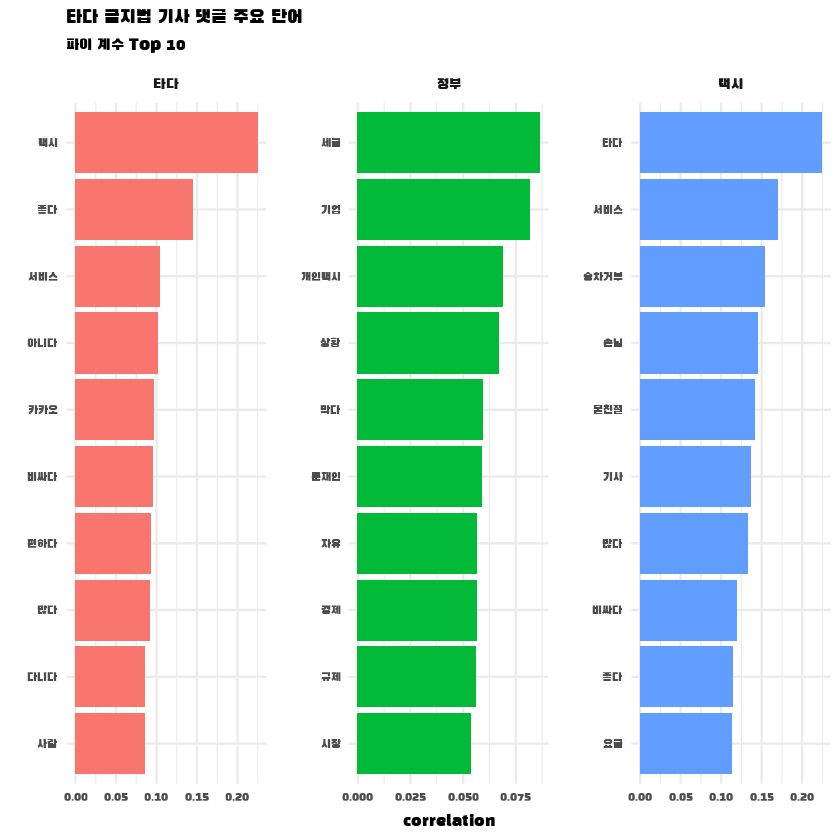

In [109]:
top_cors$item1 <- factor(top_cors$item1, levels = target)

ggplot(top_cors, aes(x = reorder_within(item2, correlation, item1),
                     y = correlation,
                     fill = item1)) +
  geom_col(show.legend = F) +
  facet_wrap(~ item1, scales = "free") +
  coord_flip() +
  scale_x_reordered() +

  labs(title = "타다 금지법 기사 댓글 주요 단어",
       subtitle = "파이 계수 Top 10",
       x = NULL) +

  theme_minimal() +
  theme(text = element_text(family = "blackhansans"),
        plot.title = element_text(size = 14, face = "bold"),
        plot.subtitle = element_text(size = 12),
        strip.text = element_text(size = 11))

- 타다 : "타다"와 가장 관계가 큰 단어가 "택시"인 것을 보면, 타다와 택시 업계의 갈등을 다룬 댓글이 많다는 것을 알 수 있다. "서비스", "편하다", "좋다", "많다"같은 단어를 보면 전반적으로 타다의 장점을 표현한 단어와 관련성이 큼
- 택시 : "택시"와 관계가 가장 큰 단어가 "타다"인 이유는 앞의 설명과 마찬가지로 타다와 택시 업계의 갈등을 다룬 댓글이 많기 대문이라고 볼 수 있다. 전반적으로 "서비스", "승차거부", "불친절", "요금", "비싸다"등 택시 서비스의 품질을 비판할 때 사용하는 단어와 관련성이 큼
- 저부 : "정부"와 관계가 가장 큰 단어가 "세금"인 것을 보면, 정부의 세금 운용을 비판하는 댓글이 많다는 것을 알 수 있음. 전반적으로 "기업", "자유", "시장", "경제", "규제", "막다"등 정부가 산업 발전을 막는다는 비판을 할 때 사용하는 단어와 관련성이 큼

**네트워크 그래프**


Attaching package: 'tidygraph'


The following object is masked from 'package:stats':

    filter




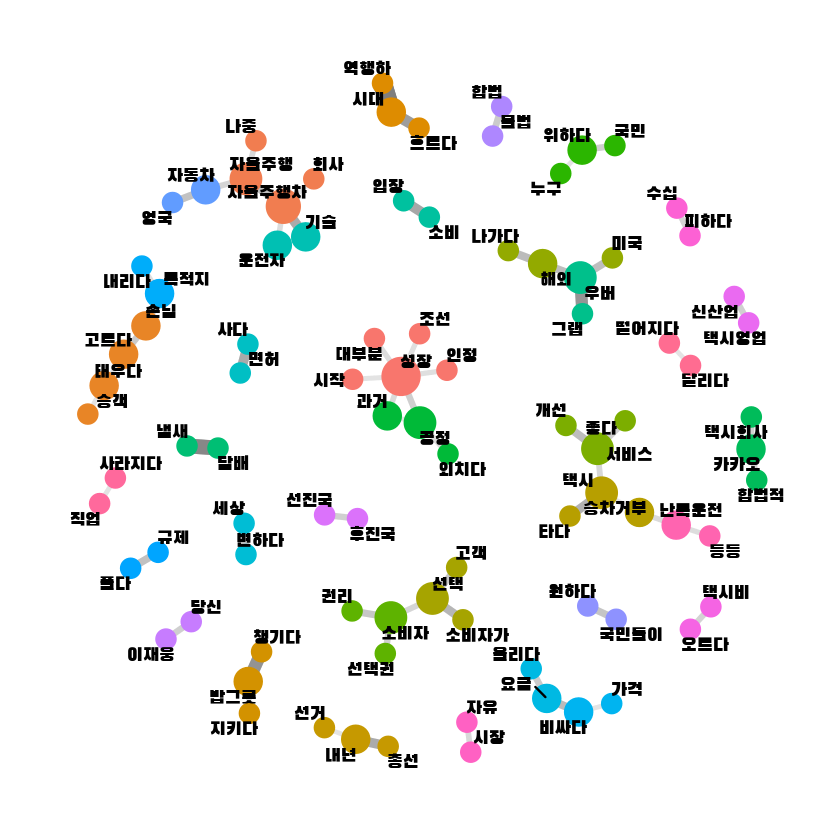

In [110]:
# 네트워크 그래프 데이터 만들기
library(tidygraph)
set.seed(1234)
graph_cors <- word_cors %>%
  filter(correlation >= 0.15) %>%
  as_tbl_graph(directed = F) %>%
  mutate(centrality = centrality_degree(),       # 중심성
         group = as.factor(group_infomap()))     # 커뮤니티

# 네트워크 그래프 만들기
library(ggraph)
set.seed(1234)
ggraph(graph_cors, layout = "fr") +              # 레이아웃

  geom_edge_link(color = "gray50",               # 엣지 색깔
                 aes(edge_alpha = correlation,   # 엣지 명암
                     edge_width = correlation),  # 엣지 두께
                 show.legend = F) +              # 범례 삭제
  scale_edge_width(range = c(1, 4)) +            # 엣지 두께 범위

  geom_node_point(aes(size = centrality,         # 노드 크기
                      color = group),            # 노드 색깔
                  show.legend = F) +             # 범례 삭제
  scale_size(range = c(5, 10)) +                 # 노드 크기 범위

  geom_node_text(aes(label = name),              # 텍스트 표시
                 repel = T,                      # 노드밖 표시
                 size = 5,                       # 텍스트 크기
                 family = "blackhansans") +       # 폰트

  theme_graph()  

### 댓글 내용 탐색

In [112]:
tada %>%
    filter(str_detect(reply_raw, "선거")) %>%
    filter(str_detect(reply_raw, "내년")) %>%
    head(10) %>%
    mutate(reply = paste0(str_replace_all(reply_raw,
                                         "내년",
                                         font("내년")))) %>%
    pull(reply) %>%
    cat(sep = "\n\n")

이런 인간들이 어딨어? 국토위 의원 이 사람들 반드시 내년에 낙선시켜야 한다! 선거표 의식에서 국민들의 편익이나 변화에는 관심없고...쪽수가 많은 택시기사들 눈치보니라고 이런 짓껄이를 하는가 보네....예전에 박그네가 지 대통령 표의식해서 세종시 추진한 것하고 똑같네....나라 말아먹는 짓거리지...한국당 의원들도 똑같은 인간들이지 지들 표만 건질려고...한마디로 의원들 잘살펴보고 투표합시다!! 당장 취소해라!!

택시기사들 눈치 보지 말고, 내년 선거를 의식 하지 말고, 불법은 불법으로 규정 짓고 합법은 대대적인 지원을 통해 국민의 삶을 더욱 윤택하게 하라. 내년 제정만 방만하게 하면 나라 살림과 국민의 삶이 풍요롭게 되는지 되묻고 싶다. 소득이 주도하는 성장은 이제 그만하고 멀리 볼 수 있는 국가적 먹거리에 투자하길 바란다. 지금 정부가 쏟아 붓고 있는 내년 예산은 빛이며 후대의 우리 자손들이 값아야 할 빚이다. 이정부 너무하네.... ㅠ

그래도정의로운국회의원이있어다행입니다 박홍근의원화이팅중랑구조합원님들 내년선거에꼭지원바랍니다본회의통과응원합시다

국개들 내년 선거 눈치보느라..ㅋㅋㅋ

국회는 역시 경제.발전 보다는 표가 먼저다. 내년 선거에서 택시들 표를 의식하지 않을 수가 없네.

스타트업하시는 분들 여기서 이러지들 마세요~~~ 특히, 현정부는 겉과 속이 다른 사람들입니다~~~더우기 내년, 내후년 계속 선거입니다...저들은 정치-즉, 지들 기득권을 지켜줄 표를 더 중요하게 생각합니다!!! 저들이 말하는 미래와 우리가 바라는 미래는 분명히 틀립니다!!! 미국, 일본, 중국으로 가세요~~동남아도 괜찮읍니다~~~ 여긴 희망이 없어요......T T 저처럼 몇년을 고생하다 빛떠앉고 망하지 마세요......

좌든 우든 내년 선거에 표는 받아야하거든.. 입법을 뒤로 미루고 사회적 합의가 우선일텐데 입법으로 표부터 얻으려는 ..0

멍충아 왜 그러게 사업확장을 그렇게 빨리하려고 했냐? 정치인은 표로 먹고사는데 당장 내년 초가 선거야 너도 한표 행사하고 택시기사도 

In [113]:
tada %>%
    filter(str_detect(reply_raw, "내년")) %>%
    filter(str_detect(reply_raw, "총선")) %>%
    head(10) %>%
    mutate(reply = paste0(str_replace_all(reply_raw,
                                         "총선",
                                         font("총선")))) %>%
    pull(reply) %>%
    cat(sep = "\n\n")

내년에 총선 민주당은 아마도 작살날것...지난 서울.,수도권 싹쓸이 꿈도 꾸지 말지어다..그렇다고 표가 자한당으로 갈것도 아니고..지금보다 국회가 더 어수선한 상황이 전개될것..서민은 더 살기 힘들고 서울 집값은 더 오르고 민심 대란이 일어날것..

이 나라는 국민이 내년 4월 총선에서 심판해야 할 것이다

ㅎㅎ. 지금 정부가 타다 운전자와 가족들수 그리고 전국의 택시기사들과 그 가족들 수 합계를 계산해본 결과 택시 쪽 손을 들어주는게 내년 총선과 정권 연장에 도움이 된다고 판단한거야. 이용자의 불편 따위는 표로 환산 되는게 아니거던.ㅎㅎ

국회 교통위원 명단 나오면 내년 총선에서 봅시다

웃기는 대한민국. 국회의원이란 것들이 내년 총선에 택시노조 무서워서 뭐가 어떤건지도 모르고. 한심하다

ㅋㅋ 택시기사들 표가 필요하디? 내년 총선 결과보고 결정하겠다는 거네 미처가지고 진짜

내년총선이라 택시표 얻어야되거든 ㅋㅋㅋ 왜 이게 지금 터지는지 잘 생각해봐 흑우들아

내년 총선용 ..택시 기사 손들어주기....

내년 총선때문이지. 민주당 똥물 떨어질까봐.

법안발의가 국민 편의나 나라 경제 고려는 안하고 내년 총선에만 오리엔티드된 개쳐눅일놈의 국개. 발의한놈, 동조한놈 속한 정당 절대 안찍는다!


#### - 선거-내년-총선 : "선거"와 "내년", "내년"과 "총선"을 함께 언급한 댓글을 보면, 2020년에 있을 국회의원 선거를 의식하고 법안을 개정했다는 비판

In [117]:
tada %>%
    filter(str_detect(reply_raw, "목적지")) %>%
    filter(str_detect(reply_raw, "손님")) %>%
    head(10) %>%
    mutate(reply = paste0(str_replace_all(reply_raw,
                                         "손님",
                                         font("손님")))) %>%
    pull(reply) %>%
    cat(sep = "\n\n") 

목적지 입력없이 앱이나 전화로 콜만해서[가려받기 방지] 기사 손님 둘다 평가받게 하고[클린한 문화] 3진아웃제도 적용해서 기사 손님 둘다 블랙 만들면 좀 나아지려나 욕부터 하지말고 방법을 찾아봅시다. 택시 손들고 잡는 구시대적인 방법 좀 없애고 목적지 부터 묻는 문화 없애고 서로 평가하면서 클린하게

발전을 하려면 변화를 가지고 시도하는게 맞다 근데 대한민국은 정치 때문에 본인욕심 챙기고 나머지를 볼려고하니 국민들이 원하는 발전보다 본인들 이득이 생기는 발전을 지향한다 타다가 택시의 생계를 위협하면 경쟁하면된다 택시들도 서비스 질을 높이고, 승차거부없이 목적지 골라 태우지말고 모든 손님을 태우면되는것이다. 간혹 택시기사님들 손님 없다고 택시안에서 담배 핀다 몇번이고 목격했다. 그리고 택시를 타는 가장 큰 목적은 편의성인데 조금만 골목길로 들어가는 경로, 빈차로 되돌아 와야하는 외진 지역은 거의 대놓고 싫은 내색 다한다.

타다가 불법인것은 사실이다..이재웅이가 말 장난으로 공유서비스라는 명목하에 영업 면허없이 유상 운송수단으로 불법 영업을한게 사실이기때문에 타다가 처음 운행될때 조금 염려 스러웠는데 결국은 이렇게 되는군...택시 기사들이 친절하게 손님을 맞이하고 차안에서 담배피지 말고 쓸데없는말않하고 조용히 목적지 까지 바래다주는 모범 적인 행동을 보여줘야 한다~ 타다가 불법이라고 또 택시기사들 손님들한테 이런저런 소리 하지말고 본연의 소임만 하기 바란다..

택시 기사님들 잘못 된 것!! 승객을 가려받는다. 승객이 가고자 하는 길은 요금이 어느정도 나오지 않는 이상 절대 않갈려고 하고 본인이 갈려고 하는길만 간다. [사람따라 다르지만 그냥 조용히 운전 만 했으면 좋겠다]. 손님이 잠깐 눈 부친 사이에 돌아 가기도 한다. 알고도 일부러 돌아가는 경우가 태반. 특히나 시간이 늦은 상태로 목적지에 도착해서 결제 할려고 하는데 차량이 멈추게 되면 원래 미터기를 정지해야 맞는건데 결제가 끝날 때 까지 켜두다가 늦어지면 오른 요금으로 결제를 한다

손님들도 ×××같은놈

In [116]:
tada %>%
    filter(str_detect(reply_raw, "손님")) %>%
    filter(str_detect(reply_raw, "골라")) %>%
    head(10) %>%
    mutate(reply = paste0(str_replace_all(reply_raw,
                                         "골라",
                                         font("골라")))) %>%
    pull(reply) %>%
    cat(sep = "\n\n")

소비자들을 좀 생각해줘야 되는거 아닌가... 이럴거면 택시 승차거부 문제같은거좀 해결해주던가.. 이마저 없애버리면 우린 또 택시 전쟁해야 하고 택시는 또 손님 골라태우고 바뀌는게 없잖아...

발전을 하려면 변화를 가지고 시도하는게 맞다 근데 대한민국은 정치 때문에 본인욕심 챙기고 나머지를 볼려고하니 국민들이 원하는 발전보다 본인들 이득이 생기는 발전을 지향한다 타다가 택시의 생계를 위협하면 경쟁하면된다 택시들도 서비스 질을 높이고, 승차거부없이 목적지 골라 태우지말고 모든 손님을 태우면되는것이다. 간혹 택시기사님들 손님 없다고 택시안에서 담배 핀다 몇번이고 목격했다. 그리고 택시를 타는 가장 큰 목적은 편의성인데 조금만 골목길로 들어가는 경로, 빈차로 되돌아 와야하는 외진 지역은 거의 대놓고 싫은 내색 다한다.

택시 타려고 해도 탑승거부에 골라서 손님 받고.. 대체 서비스도 있어야 서로 경쟁하며 고객들의 편의와 만족도가 오르지 않을까요.. 어떤 분야던 단독은 아닌듯

정치에 무관심한 나도 짜증난다... 택시 택시 거리는데... 택시만 승객받는다고 누가 정한거지? 법은 사람이 정한거고 시대에 맞게 바껴야하는거 아닌가? 무슨 특권처럼...우리가 타겠다는데 왜! 타다와 택시가 똑같다 똑같다 하는데...뭐가 같다는건가? 승차거부 여전하고 카카오택시들도 손님 골라탄다. 타다 비싸져서 안탈려고 하다가 택시 못잡아서 결국 타다 부른다. 자기들이 완벽할수 없으면 차선책은 둬야하는거 아닌가?

기득권이 아니라는 사람은 우리나라 회사택시 개인택시기사 수 그들의 가족 수 노조업체직원가족 수 생각은 하냐 택시노조는 거진 막무가내야 언제부터 택시가 대중교통이냐 원하는 손님 골라태우고 난폭운전 일삼고 심지어 암암리 택시기사 음주도 하고 운전도해 음식점도 하나 성공하면 너도나도 다 뛰어들고 경쟁하고 하다못해 지하시장 옷가게도 경쟁하는데 타다는 왜 반대하냐

택시가 갑이냐. 손님 골라서 태우고 진짜 더러워서 다시 택시타면 내가 모지리다

사실 큰 돈 안들이고 여러가지 운송법 규제는 피

#### - 목적지-손님-고르다 : "목적지"와 "손님", "손님"과 "고르다"를 함께 언급한 댓을을 보면, 택시 기사가 손님을 골라 태운다는 비판

### n-gram
- 댓긍를 바이그램으로 토큰화해 빈도를 구합니다
- 네트워크 그래프를 만들어 단어의 관계를 탐색
- 바이그램 단어쌍이 언급된 댓글을 추출해 내용을 확인

In [118]:
# 한 댓글이 하나의 행을 구성하도록 결합
line_comment <- separate_pos_tada %>%
  group_by(id) %>%
  summarise(sentence = paste(word, collapse = " "))

In [119]:
# 바이그램으로 토큰화
bigram_comment <- line_comment %>%
  unnest_tokens(input = sentence,
                output = bigram,
                token = "ngrams",
                n = 2)

bigram_comment %>% print

# A tibble: 50,608 x 2
      id bigram           
   <int> <chr>            
 1     1 분단 결론        
 2     1 결론 진정성      
 3     1 진정성 결과적    
 4     1 결과적 타다      
 5     1 타다 택시        
 6     1 택시 맞다        
 7     1 맞다 택시업계    
 8     1 택시업계 헌법위반
 9     1 헌법위반 드론택배
10     1 드론택배 불법    
# ... with 50,598 more rows


In [120]:
# 바이그램 분리하기
bigram_seprated <- bigram_comment %>%
  separate(bigram, c("word1", "word2"), sep = " ")

# 단어쌍 빈도 구하기
pair_bigram <- bigram_seprated %>%
  count(word1, word2, sort = T) %>%
  na.omit()

pair_bigram %>% print

# A tibble: 43,244 x 3
   word1 word2      n
   <chr> <chr>  <int>
 1 택시  타다     159
 2 타다  타다      79
 3 타다  택시      72
 4 타다  혁신      49
 5 타다  좋다      44
 6 타다  불법      42
 7 택시  서비스    37
 8 타다  금지법    27
 9 타다  다니다    27
10 택시  기사      27
# ... with 43,234 more rows


**네트워크 그래프**

Warning message:
"ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


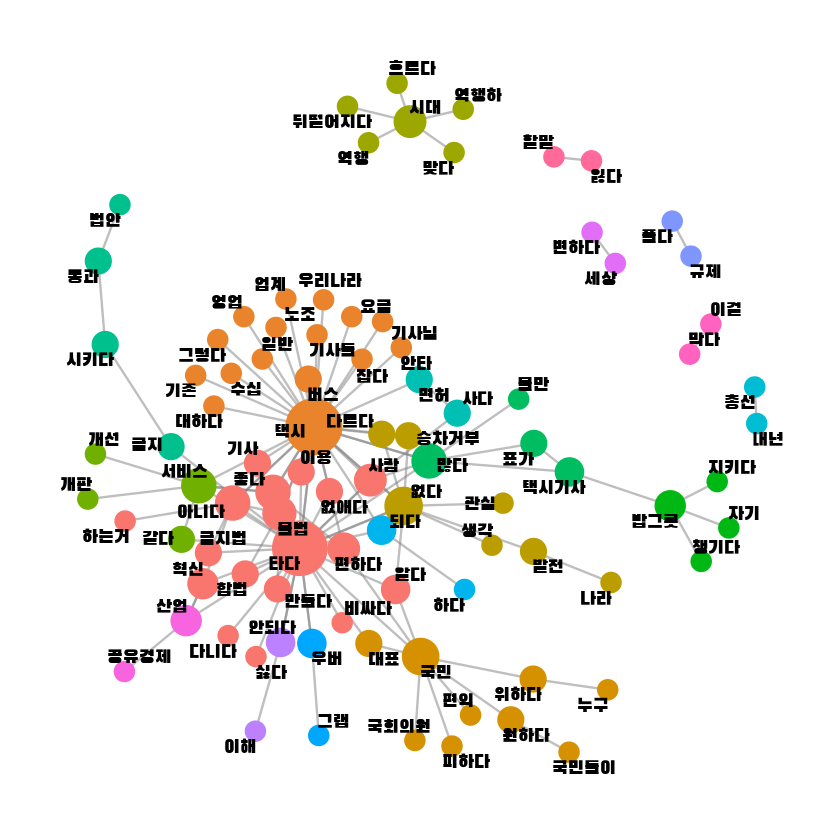

In [121]:
# 네트워크 그래프 데이터 만들기
set.seed(1234)
graph_bigram <- pair_bigram %>%
  filter(n >= 8) %>%
  as_tbl_graph(directed = F) %>%
  mutate(centrality = centrality_degree(),       # 중심성
         group = as.factor(group_infomap()))     # 커뮤니티

# 네트워크 그래프 만들기
set.seed(1234)
ggraph(graph_bigram, layout = "fr") +            # 레이아웃

  geom_edge_link(color = "gray50",               # 엣지 색깔
                 alpha = 0.5) +                  # 엣지 명암

  geom_node_point(aes(size = centrality,         # 노드 크기
                      color = group),            # 노드 색깔
                  show.legend = F) +             # 범례 삭제
  scale_size(range = c(5, 15)) +                 # 노드 크기 범위

  geom_node_text(aes(label = name),              # 텍스트 표시
                 repel = T,                      # 노드밖 표시
                 size = 5,                       # 텍스트 크기
                 family = "blackhansans") +       # 폰트

  theme_graph()     

**댓글 내용 탐색**


In [123]:
line_tada <- line_comment %>%
  left_join(tada, by = "id")

line_tada %>%
  select(sentence) %>% print

# A tibble: 5,108 x 1
   sentence                                                                     
   <chr>                                                                        
 1 분단 결론 진정성 결과적 타다 택시 맞다 택시업계 헌법위반 드론택배 불법 현재~ 
 2 러다이트 운동 영국 중부 북부 직물공업지대 일어나다 기계 파괴운동 택시기사들 ~
 3 저런것들도 국회의원                                                          
 4 우버 그랩 같다 서비스 자연 서비스 택시 서비스 자율경쟁 통하다 상생 제도 개선~
 5 택시승차거부하면 벌금 만원 때리다 근무복                                     
 6 자율주행택시 나오다 택시기사들 뒤지다 왜이렇게 밥그릇 지키다                 
 7 옛말 고인 물다 썩다 택시기사들 꼬라지 고이다 상태 승차거부 시작해서 정치 이~ 
 8 택시 자격증 따다 운행하면 모르다 자격증 운행                                 
 9 편법 돈벌라는 양아치들 내주                                                  
10 똥남아보다 우리나라 네트웍 강국 맞다 택시 타다 태국 민주당 감성팔이 우치다보~
# ... with 5,098 more rows


In [124]:
line_tada %>%
    filter(str_detect(sentence, "시대 역행")) %>%
    filter(str_detect(reply_raw, "역행")) %>%
    head(10) %>%
    mutate(reply = paste0(str_replace_all(reply_raw,
                                         "역행",
                                         font("역행")))) %>%
    pull(reply) %>%
    cat(sep = "\n\n")

한국은 정치인들땜에 발전이 없고 나라 망한다! 택시표심때문에 시대의 역행하고 있고 진작 우버라든지 시대의 맞게 개방하고 개선되야 하는데 기득권 지킬려다 조선망하듯 망할듯 ㅜ ㅜ 꼭 노조집행부와 정치인들이 똑같해~~~

미친.... 이런 시대를 역행하는 법안은 도데체 어디서 발의하는거냐

시대랑 역행으로 가네 ㅋㅋㅋㅋ 무인주행자동차 금지법도 만들어라 이럴꺼면 ㅋㅋㅋㅋㅋㅋㅋㅋㅋ

시대를 역행하네.....

아니 왜이러지...진짜. 시대를 역행하는건가...

시대를 역행하는 정치인들 택시기사표만 의식하고

시대를 역행하네..ㅠ

니들한테 진보와 보수라는 말이 아깝다는 생각이 든다. 시대를 역행하는 법안들과 쓸모없는 법안은 잘도 통과 시키네...ㅋㅋㅋ 역시 좌파와 우파는 완전히 믿으면 안돼....

택시표 택시표 시대를 역행하는...국민들 편의와 이익은 생각지도 않는구나 총선에서 택시표가 니들향할줄알지?어짜피 정답은 나와있어 어떤 차악을뽑는 거냐지

OOO들 어휴 시대를 역행하네 앞으로 택시 사업이 바뀌어야하는건 필수인데 택시 꼰대들 발악하네 진짜


In [125]:
line_tada %>%
    filter(str_detect(sentence, "시대 뒤떨어지다")) %>%
    filter(str_detect(reply_raw, "뒤떨어")) %>%
    head(10) %>%
    mutate(reply = paste0(str_replace_all(reply_raw,
                                         "뒤떨어",
                                         font("뒤떨어")))) %>%
    pull(reply) %>%
    cat(sep = "\n\n")

대한민국이 자유민주주의 국가 맞나요? 시대 뒤떨어진 사고로 나라가 낙후되어 가네요.

전 세계에 우버가 다 있는데 이거 결국 시대에 뒤떨어지는 결정임...

거꾸로 가는 나라. 시대에 뒤떨어진 나라가 되어 가는구나.

미친 놈 욕 밖에 안 나오네. 정말 시대에 뒤떨어지는 규제만 알고 있는 자다. 이런자가 공정거래위에 이어 정책실장에 가 있으니 한심한 정권이지.

진짜 시대에 뒤떨어져사는구나 ㅋㅋㅋ 동남아보다 못한나라

시대에 뒤떨어지는 사람들이 지들밥그릇사수 하고있으니까 이런일이 생기지

시대에 뒤떨어지는 꼴이지 뭐

기술이 발전하고 세상이 바뀌면서 시대에 뒤떨어지는 서비스는 도태되고 새로운 서비스들이 경쟁력이 생기는게 자연스러운건데 그걸 법으로 막으려고 하니깐 타다금지법이란 소릴 듣는거다

진짜 댓글 잘 안쓰는데... 정치하는 놈들은 진짜 시대에 뒤떨어진다..우버나 그랩이나 외국나가서 이용해봐라 얼마나 편리한지.. 정치하는놈들이야 그런거 이용 안하니 모르지..

대한민국이 이제 시대에 뒤떨어지게 만들래?


- 역행-시대-뒤떨어지다 : "시대 역행", "시대 뒤떨어지다"를 언급한 댓긍릉 보면, 법안 개정이 시대에 뒤떨어진 판단이라는 비판을 담고 잇다.

In [126]:
line_tada %>%
    filter(str_detect(sentence, "택시 면허")) %>%
    filter(str_detect(reply_raw, "면허")) %>%
    head(10) %>%
    mutate(reply = paste0(str_replace_all(reply_raw,
                                         "면허",
                                         font("면허")))) %>%
    pull(reply) %>%
    cat(sep = "\n\n")

택시 면허 남발 하자 타다불법이라니 왜 막음

택시 면허를 사서 영업을 해야지...면허도 없이 권리도 없이 택시와 유사 행위를 하는게 맞냐??

택시 면허제를 완전히 없애라!!!

타다가 무슨 혁신기업이라고 봐줘야 되냐. 기존 점보택시랑 다할게 없는데. 정식으로 택시 면허 사서 하면 누가 뭐라 하냐. 꼼수로 면허 돈 주고 안사서 한다니 문제지.

법을 위반하면 처벌하는 것이 공정한 사회다 불법을 저지르면 처벌하라 그리고 서민들의 밥통을 뺏지말라 카카오 처럼 택시 면허사서 정당하게 사업하라

택시 면허의 진입장벽이 상당히 높은편이고 택시번호판 시장이라는게 존재하는데 이걸 싸그리무시하고 새로운 사업모델을 받아들이면 그게 공산주의지 법적안정성을 훼손하는데 혁신이라는건 기존 관행 관습 규범 규제 따위를 아우르면서 새로운 더나은 서비스를 만드는것이 혁신이다 대표적인 예로 쏘카 같은게 혁신이라고.

카카오택시처럼 면허사서 영업하면 되지 않나, 렌트카로 택시영업하면 불법이 당연하지

불법을 정상이라고 말하는 것들은 도대체 뭐냐? 타다 관련자들이냐? 택시처럼 면허 사고 기존 규칙 안에서 공정경쟁해라. 아무도 시시비비 안 건다. 타다가 정상이면. 사업자로 노란넘버 누가 사용하냐? 차만 사서 그냥 운용하지. 화물이고 버스고 택시고 전부 흰넘버 사용하지. 안 그래?

그렇지 '택시 면허 보호법'이겠지

엄연히 불법을 편하다고해서 허용하면 누구나 의료행위 부동산 중개업 변호사업 법무사 전기 면허 왜 필요한가 엄연히 여객운송은 자동차 운전면허가 아닌 여객운송사섭면허와 택시 면허로 하는것을 먼 국민편의? 나라시 콜띠기 가무슨 혁신


In [127]:
line_tada %>%
    filter(str_detect(sentence, "면허 사다")) %>%
    filter(str_detect(reply_raw, "사서")) %>%
    head(10) %>%
    mutate(reply = paste0(str_replace_all(reply_raw,
                                         "사서",
                                         font("사서")))) %>%
    pull(reply) %>%
    cat(sep = "\n\n")

택시 면허를 사서 영업을 해야지...면허도 없이 권리도 없이 택시와 유사 행위를 하는게 맞냐??

타다가 무슨 혁신기업이라고 봐줘야 되냐. 기존 점보택시랑 다할게 없는데. 정식으로 택시 면허 사서 하면 누가 뭐라 하냐. 꼼수로 면허 돈 주고 안사서 한다니 문제지.

이건 타다가 잘못한거. 면허 사서 하겠다더니 정부와 합의 꺠고 렌터카로만 1만대 돌리겠다고 발표하면 어쩌라는겨. 국토부에서 불법화 검토하겠다고 한 후에도 바로잡지 않고 버티면서 타다 금지법 어쩌구 언플만하는데. 나라시 콜밴에 어플 붙여서 혁신이라고 우기는데. 우버나 그랩 케이스를 봐도 그렇고 결국 대중교통 택시시장 진입하고 접수하기 위한 방편이라는 혐의에서 자유롭지 않아 보이기도 하고.

불법을 정상이라고 말하는 것들은 도대체 뭐냐? 타다 관련자들이냐? 택시처럼 면허 사고 기존 규칙 안에서 공정경쟁해라. 아무도 시시비비 안 건다. 타다가 정상이면. 사업자로 노란넘버 누가 사용하냐? 차만 사서 그냥 운용하지. 화물이고 버스고 택시고 전부 흰넘버 사용하지. 안 그래?

카카오처럼 택시면허 사서 안하고 잔대가리 굴려서 거저해처먹을려다 좠됐네.

그냥 면허 사서 하면되는데 여론 몰이 해서 그 돈 아껴보려는거지. 기존에 있던 법질서에서 공존 할 생각보단 자신만의 이익을 보는거다. 타다 좋다고 타는데 사고나서 독박쓴 기사 한줄 나면 안타고 싶어진껄ㅋㅋ

이재웅씨.. 헛소리 마세요... 정정당당하게 카카오처럼 면허 사서 하세요.. 왜 남의 면허시장을 날로 처먹으려 하세요... 양심 좀 있어 보세요.

타다하고 싶으며 이재웅 너도 면허 사서해라!!! 권력옆에서 이익 볼려고 하지말고 타다가 무슨 4차 혁명이나???

택시 면허 사서 운영하면 될걸 왜 편법을 저지르냐 그리고 강제배차 가지고 무슨 대단한 혁신인냥 포장질이냐 더군다나 택시 기사도 아니고 그냥 알바들 써가며 운용하는데 저게 대형마트의 골목침투밖에 더 되냐 타다한테 혁신은 없고 꼼수만 보인다

면허 사서 하면 되는거 아냐 설마 돈이 없는건 아니지 항상 무리

- 택시-면허-사다 : "택시 면허", "면허 사다"를 언급한 댓글을 보면, 택시 면허 거래를 비판하는 의견과 타다도 택시와 동등하게 면허를 사서 영업해야 한다는 상반된 의견이 있다.

### 토픽 모델링
- LDA 모델 생성
- 토픽별 주요 단어로 그래프 생성
- 댓글을 토픽별로 분류, 토픽별 댓글 수와 주요 단어를 나타낸 그래프 생성
- 토픽별 주요 문서의 내용을 살펴보고 토픽 이름을 생성

### 토픽 모델링 전처리

In [128]:
# 명사 추출
noun_tada <- tada %>%
  distinct(reply, .keep_all = T) %>%                   # 중복 댓글 제거
  filter(str_count(reply, boundary("word")) >= 3) %>%  # 짧은 댓글 제거
  unnest_tokens(input = reply,                         # 명사 추출
                output = word,
                token = extractNoun,
                drop = F) %>%
  filter(str_count(word) > 1)

# 중복, 고빈도 단어 제거
unique_noun_tada <- noun_tada %>%
  group_by(id) %>%                                     # 중복 단어 제거
  distinct(word, .keep_all = T) %>%
  ungroup() %>%
  add_count(word) %>%                                  # 고빈도 단어 제거
  filter(n <= 200) %>%
  select(id, word)

unique_noun_tada %>% print

# A tibble: 36,972 x 2
      id word    
   <int> <chr>   
 1     1 분단    
 2     1 결론    
 3     1 진정    
 4     1 결과    
 5     1 업계    
 6     1 헌법위반
 7     1 드론    
 8     1 택배    
 9     1 현재    
10     1 국기    
# ... with 36,962 more rows


### LDA 모델 생성

In [130]:
# 문서별 단어 빈도 구하기
count_word <- unique_noun_tada %>%
  count(id, word, sort = T)

# DTM 만들기
dtm_tada <- count_word %>%
  cast_dtm(document = id, term = word, value = n)

dtm_tada %>% print

<<DocumentTermMatrix (documents: 4745, terms: 11025)>>
Non-/sparse entries: 36972/52276653
Sparsity           : 100%
Maximal term length: 41
Weighting          : term frequency (tf)


Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated."


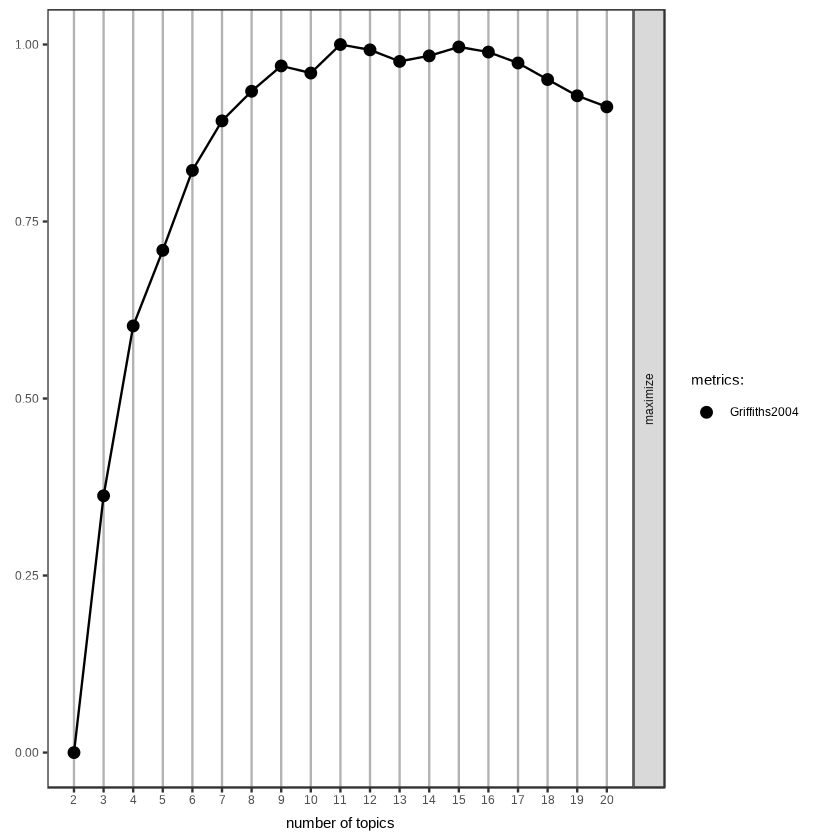

In [131]:
library(ldatuning)
models_tada <- FindTopicsNumber(dtm = dtm_tada,
                                topics = 2:20,
                                return_models = T,
                                control = list(seed = 1234))

# 성능 지표 그래프
FindTopicsNumber_plot(models_tada)

In [132]:
# 토픽 수가 9개인 모델 추출
lda_model <- models_tada %>%
  filter(topics == 9) %>%
  pull(LDA_model) %>%              # 모델 추출
  .[[1]]                           # list 추출

lda_model

A LDA_Gibbs topic model with 9 topics.

### 토픽별 주요 단어 탐색

In [134]:
# 토픽별 단어 확률 beta 추출
term_topic <- tidy(lda_model, matrix = "beta")

In [136]:
# 토픽별 beta 상위 단어 추출
term_topic %>%
  group_by(topic) %>%
  slice_max(beta, n = 15) %>%
  head

topic,term,beta
<int>,<chr>,<dbl>
1,하게,0.01816778
1,금지,0.01758857
1,하다,0.01662323
1,기존,0.01662323
1,때문,0.01392026
1,하려,0.01083116


In [137]:
# 불용어 목록 생성
stopword_lda <- c("하게", "하다", "하려", "해라", "그것", "하면", "하네",
                  "하기", "하나", "해서", "하면", "하지", "한거", "니들")

# 불용어 제외 후 상위 10개 단어 추출
top_term_topic <- term_topic %>%
  filter(!term %in% stopword_lda) %>%
  group_by(topic) %>%
  slice_max(beta, n = 10)

top_term_topic %>% print

# A tibble: 93 x 3
# Groups:   topic [9]
   topic term        beta
   <int> <chr>      <dbl>
 1     1 금지     0.0176 
 2     1 기존     0.0166 
 3     1 때문     0.0139 
 4     1 이상     0.0103 
 5     1 반대     0.00948
 6     1 공유     0.00948
 7     1 개인     0.00929
 8     1 신사업   0.00600
 9     1 국회의원 0.00581
10     1 정책     0.00581
# ... with 83 more rows


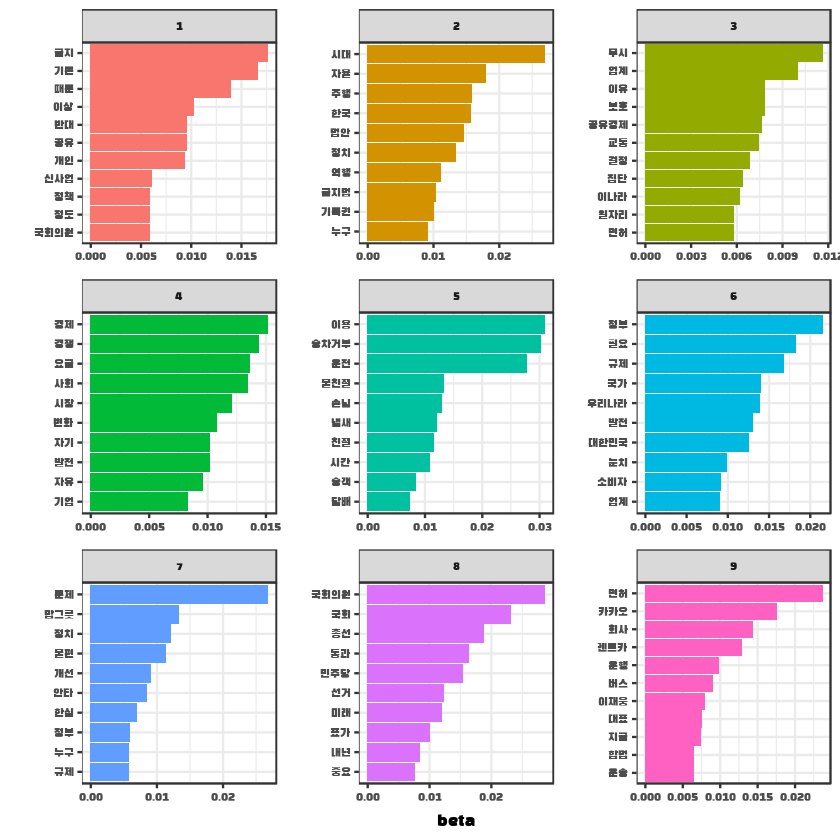

In [138]:
ggplot(top_term_topic, aes(x = reorder_within(term, beta, topic),
                           y = beta,
                           fill = factor(topic))) +
  geom_col(show.legend = F) +
  facet_wrap(~ topic, scales = "free", ncol = 3) +
  coord_flip() +
  scale_x_reordered() +
  labs(x = NULL) +
  theme(text = element_text(family = "blackhansans"))

### 토픽별로 댓글 분류

In [140]:
# 문서별 토픽 확률 gamma 추출하기
doc_topic <- tidy(lda_model, matrix = "gamma")

# 문서별로 확률이 가장 높은 토픽 추출
doc_class <- doc_topic %>%
  group_by(document) %>%
  slice_max(gamma, n = 1)

doc_class %>% print

# A tibble: 8,134 x 3
# Groups:   document [4,745]
   document topic gamma
   <chr>    <int> <dbl>
 1 1            3 0.529
 2 10           1 0.165
 3 100          2 0.126
 4 100          6 0.126
 5 1000         6 0.140
 6 1001         4 0.129
 7 1002         3 0.140
 8 1003         6 0.124
 9 1003         8 0.124
10 1003         9 0.124
# ... with 8,124 more rows


In [141]:
# integer로 변환
doc_class$document <- as.integer(doc_class$document)

# 원문에 토픽 번호 부여
tada_topic <- tada %>%
  left_join(doc_class, by = c("id" = "document"))

### 토픽별 댓글 수와 단어 시각화

In [142]:
top_terms <- term_topic %>%
  filter(!term %in% stopword_lda) %>%
  group_by(topic) %>%
  slice_max(beta, n = 6, with_ties = F) %>%
  summarise(term = paste(term, collapse = ", "))

top_terms %>% print

# A tibble: 9 x 2
  topic term                                    
  <int> <chr>                                   
1     1 금지, 기존, 때문, 이상, 반대, 공유      
2     2 시대, 자율, 주행, 한국, 법안, 정치      
3     3 무시, 업계, 이유, 보호, 공유경제, 교통  
4     4 경제, 경쟁, 요금, 사회, 시장, 변화      
5     5 이용, 승차거부, 운전, 불친절, 손님, 냄새
6     6 정부, 필요, 규제, 국가, 우리나라, 발전  
7     7 문제, 밥그릇, 정치, 불편, 개선, 안타    
8     8 국회의원, 국회, 총선, 통과, 민주당, 선거
9     9 면허, 카카오, 회사, 렌트카, 운행, 버스  


In [143]:
count_topic <- tada_topic %>%
  count(topic) %>%
  na.omit()

count_topic

topic,n
<int>,<int>
1,897
2,920
3,809
4,898
5,866
6,991
7,852
8,1002
9,899


In [144]:
count_topic_word <- count_topic %>%
  left_join(top_terms, by = "topic") %>%
  mutate(topic_name = paste("Topic", topic))

count_topic_word

topic,n,term,topic_name
<int>,<int>,<chr>,<chr>
1,897,"금지, 기존, 때문, 이상, 반대, 공유",Topic 1
2,920,"시대, 자율, 주행, 한국, 법안, 정치",Topic 2
3,809,"무시, 업계, 이유, 보호, 공유경제, 교통",Topic 3
4,898,"경제, 경쟁, 요금, 사회, 시장, 변화",Topic 4
5,866,"이용, 승차거부, 운전, 불친절, 손님, 냄새",Topic 5
6,991,"정부, 필요, 규제, 국가, 우리나라, 발전",Topic 6
7,852,"문제, 밥그릇, 정치, 불편, 개선, 안타",Topic 7
8,1002,"국회의원, 국회, 총선, 통과, 민주당, 선거",Topic 8
9,899,"면허, 카카오, 회사, 렌트카, 운행, 버스",Topic 9


Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'nanumgothic' not found, will use 'wqy-microhei' instead"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'nanumgothic' not found, will use 'sans' instead"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'nanumgothic' not found, will use 'wqy-microhei' instead"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'nanumgothic' not found, will use 'wqy-microhei' instead"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'nanumgothic' not found, will use 'wqy-microhei' instead"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'nanumgothic' not found, will use 'wqy-microhei' instead"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label),

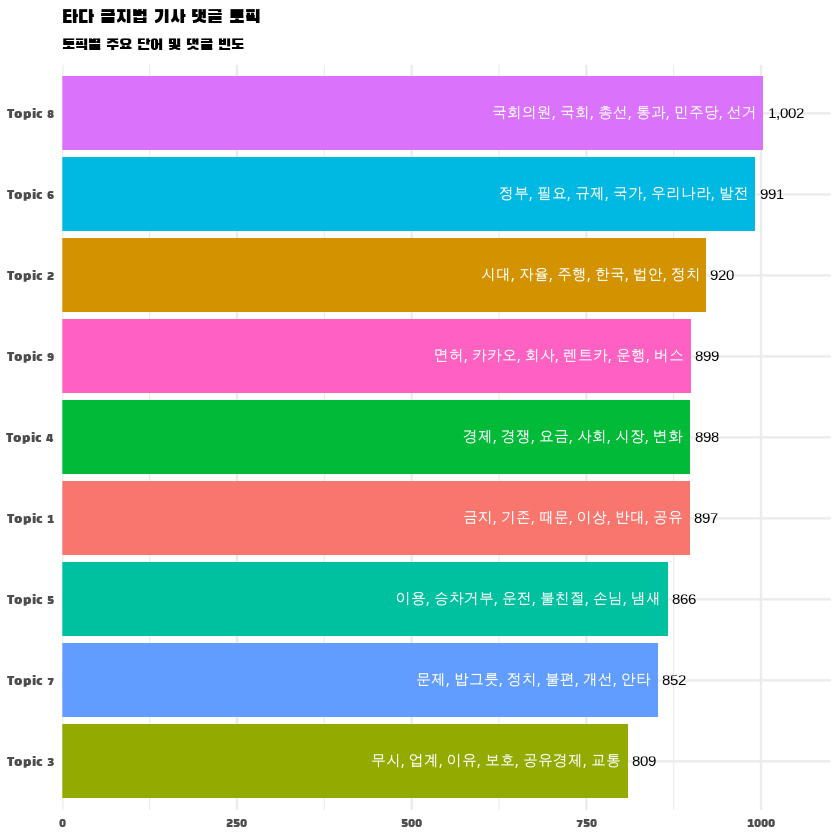

In [146]:
library(scales)
ggplot(count_topic_word,
       aes(x = reorder(topic_name, n),
           y = n,
           fill = topic_name)) +
  geom_col(show.legend = F) +
  coord_flip() +

  geom_text(aes(label = comma(n, accuracy = 1)),  # 문서 빈도 표시
            hjust = -0.2) +

  geom_text(aes(label = term),                    # 주요 단어 표시
            hjust = 1.03,
            col = "white",
            fontface = "bold",
            family = "nanumgothic") +

  scale_y_continuous(expand = c(0, 0),            # y축-막대 간격 줄이기
                     limits = c(0, 1100)) +       # y축 범위

  labs(title = "타다 금지법 기사 댓글 토픽",
       subtitle = "토픽별 주요 단어 및 댓글 빈도",
       x = NULL, y = NULL) +

  theme_minimal() +
  theme(text = element_text(family = "blackhansans"),
        plot.title = element_text(size = 14, face = "bold"),
        plot.subtitle = element_text(size = 12))

### 토픽 이름 짓기

In [147]:
# 토픽별 주요 문서 추출
reply_topic <- tada_topic %>%
  group_by(topic) %>%
  slice_max(gamma, n = 100)

In [150]:
# 토픽 1 내용 살펴보기
reply_topic %>%
  filter(topic == 1) %>%
  pull(reply_raw) %>% head %>% print

[1] "택시 진짜 노답인데...급정거하고 앞차 답답하면 손님있던 없던 쌍욕 해대지 덥다고 에어콘 틀자면 춥다고 거절해 창문열면 시끄럽다고 닫으래 운전중에 당연하게 전화오면 듣던말던 시끄럽게 통화하고 공항서는 야매로 요금 더치고 오다 걸리면 묵비권행사하지 교회전도 하고 안믿는다니까 면전에대고 지옥간다지 않나 목적지 가까우면 내리라고 지랄해서 등록증 찍으면 그냥 출발해서 가는내내 욕하면서 안내려주고 목적지 가는짓도 적어도 적어도 택시가 하는 쓰레기 짓이 생기는데 이정도면 타다 불법으로 법통과할때 택시도 법으로 물갈아야 하지않겠냐?"                            
[2] "더불어민중당 것들은 이 나라 신성장 동력이라고 생각되면 다 사장시켜서 국가 경쟁력을 망가뜨리려 한다.. 미국가서 우버가 불법 콜택시라고 하면 뭐라고 하려나...."                                                                                                                                                                                                                                                                                                                                                                                                        
[3] "노동자는 경기가악화될수록 더 취약해져 안정적이고 위험하지않게 헌법으로 보장된 노조로 약자가않되게 노력하게되는거지 이젠 경제가 절정에 도달했기때문에 오직기업이 그만큼에 더 기술자질만이있어야 경제가 발전할수밖에 없는게 영원히 변하지않는 유일한법칙이다 않그럼 경제성장은 할수가없고 계속 기업은부실로 그대론데 근본적 조치도않되

- 토픽1 : 토픽 1에는 국회가 산업 발전을 가로막는다는 비판 댓글이 많다

In [151]:
# 토픽 2 내용 살펴보기
reply_topic %>%
  filter(topic == 2) %>%
  pull(reply_raw) %>% head %>% print

[1] "타다는 확실히 서비스 품질의 표준을 상향시켰고, 승차거부에 시달리던 국민들이 차별 없이 이용할 수 있게 해줬다는 점에서 혁신이라는 것임. 이러한 점에서 국민의 편익을 향상시켰다는 점은 부정할 수 없다. 이러한 상황에서 시행령 개정에 만장일치로 처리한 국회의원들은 진정한 국민의 편익 보다는 당장 눈 앞에 보이는 표심에 눈이 멀어있다는 걸 단적으로 보여준다. 박홍근을 비롯한 만장일치한 국토교통위원회 교통법안심사소위원회는 반드시 다음 선거에 심판을 받길 바란다."
[2] "해외는 우버를 비롯해서 시대 흐름에 맞춰가는데 헬조선만 택시노조 후장빠느라 시대역행하는중"                                                                                                                                                                                                                                                                                                                                                                          
[3] "ㅋ택시기사들과 가족들의 투표가 무섭더냐? 징징대는거 받아주면서 하늘을 나는 자동차 자율주행 자동차? ㅋ웃기네~2030년에도 한국은 미터기 켜는 택시 타고 다닐꺼다 징징대는 기사들 때문에"                                                                                                                                                                                                                 

- 토픽2 : 토픽 2에는 법안이 시대 흐름에 역행한다는 비판 댓글이 많다

In [152]:
# 토픽 이름 목록 만들기
name_topic <- tibble(topic = 1:9,
                     name = c("1. 신사업 가로막는 국회",
                              "2. 시대 흐름 역행하는 법안",
                              "3. 택시 업계 보호, 국민 무시",
                              "4. 자유 시장경제 반하는 결정",
                              "5. 불만족스러운 택시 서비스",
                              "6. 국가 발전 가로막는 정부",
                              "7. 기존 업계 밥그릇 지키는 정치인",
                              "8. 총선만 신경 쓰는 국회의원",
                              "9. 타다는 렌트카, 무면허 택시 안된다"))

In [153]:
# 토픽 이름 결합하기
top_term_topic_name <- top_term_topic %>%
  left_join(name_topic, name_topic, by = "topic")

top_term_topic_name %>% print

# A tibble: 93 x 4
# Groups:   topic [9]
   topic term        beta name                   
   <int> <chr>      <dbl> <chr>                  
 1     1 금지     0.0176  1. 신사업 가로막는 국회
 2     1 기존     0.0166  1. 신사업 가로막는 국회
 3     1 때문     0.0139  1. 신사업 가로막는 국회
 4     1 이상     0.0103  1. 신사업 가로막는 국회
 5     1 반대     0.00948 1. 신사업 가로막는 국회
 6     1 공유     0.00948 1. 신사업 가로막는 국회
 7     1 개인     0.00929 1. 신사업 가로막는 국회
 8     1 신사업   0.00600 1. 신사업 가로막는 국회
 9     1 국회의원 0.00581 1. 신사업 가로막는 국회
10     1 정책     0.00581 1. 신사업 가로막는 국회
# ... with 83 more rows


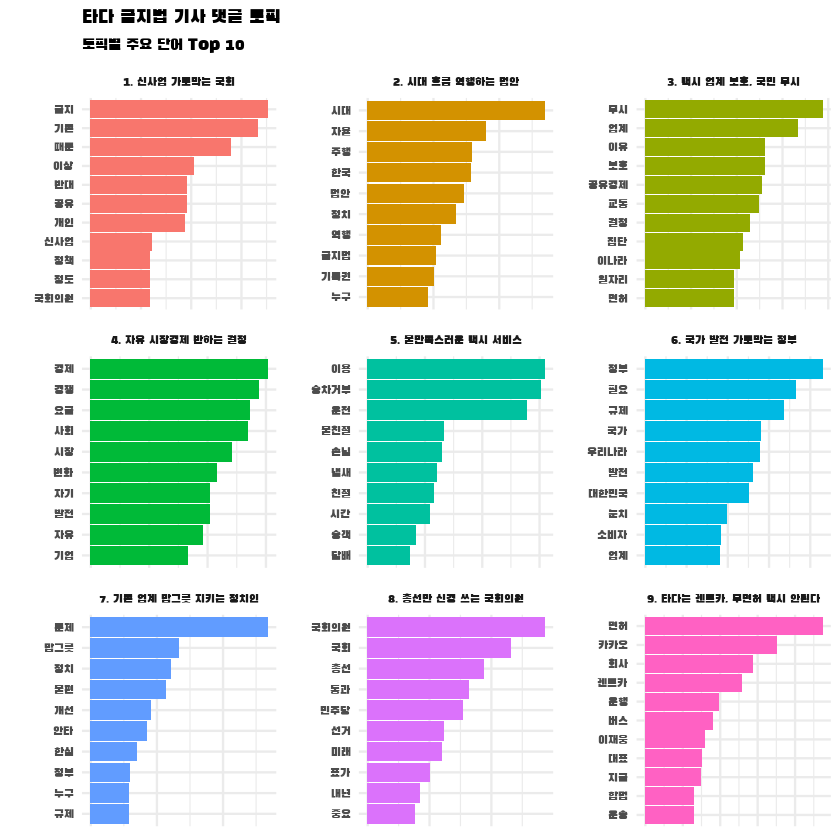

In [154]:
ggplot(top_term_topic_name,
       aes(x = reorder_within(term, beta, name),
           y = beta,
           fill = factor(topic))) +
  geom_col(show.legend = F) +
  facet_wrap(~ name, scales = "free", ncol = 3) +
  coord_flip() +
  scale_x_reordered() +

  labs(title = "타다 금지법 기사 댓글 토픽",
       subtitle = "토픽별 주요 단어 Top 10",
       x = NULL, y = NULL) +

  theme_minimal() +
  theme(text = element_text(family = "blackhansans"),
        plot.title = element_text(size = 14, face = "bold"),
        plot.subtitle = element_text(size = 12),
        axis.text.x = element_blank(),   # x축 이름 삭제
        axis.ticks.x = element_blank())  # x축 눈금 삭제